# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [1]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

##### Представленные типы данных: 

int64 - целые числа

object - текст

Не все данные представлены в удобном для работе виде. Также по df.info() видно, что есть пропуски в Income (2216 значений, когда в остальных 2240).

##### Кроме того:
 Income (доход) надо преобразовать в float64 , так как это не целочисленное значение (плавающее значение с точкой)
 
 Dt_Custome (дата регистрации) надо преобразовать в datetime64 (т.к. это дата)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#отсортируем данные в порядке возрастания по уникальному идентификационному номере:
df=df.sort_values('ID')

# Чтобы полностью открыть таблицу можно воспользоваться этими двумя строчками кода:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

#откроем таблицу
df.head(2240)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1503,0,1985,Graduation,Married,"$70,951.00",0,0,5/4/13,66,239,...,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
1956,9,1975,Master,Single,"$46,098.00",1,1,8/18/12,86,57,...,2,8,0,0,0,0,0,0,0,CA
1311,13,1947,PhD,Widow,"$25,358.00",0,1,7/22/13,57,19,...,3,6,0,0,0,0,0,0,0,SA
1834,17,1971,PhD,Married,"$60,491.00",0,1,9/6/13,81,637,...,7,5,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,11178,1972,Master,Single,"$42,394.00",1,0,3/23/14,69,15,...,3,7,0,0,0,0,0,0,0,GER
1925,11181,1949,PhD,Married,"$156,924.00",0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,0,0,CA
529,11187,1978,Basic,Single,"$26,487.00",1,0,5/20/13,23,2,...,3,5,0,0,0,0,0,0,0,CA
1897,11188,1957,Graduation,Together,"$26,091.00",1,1,2/25/14,84,15,...,3,5,0,0,0,0,0,0,0,SP


In [3]:
#оптимизируем некоторые данные, чтобы дальше удобнее было искать выбросы.

#заполним колонку Year_Birth новыми данными - запишем в ней возраст покупателя.
df['Year_Birth']  = df['Year_Birth'] = 2022 - df['Year_Birth']

#заполним колонку Kidhome новыми данными - запишем в ней данные о количестве детей в семье.
df['Kidhome'] = df['Kidhome'] + df['Teenhome']
 
#создадим новую колонку Mnt_all - запишем в ней данные об общих тратах клиента в сервисе.
df['Mnt_all'] = df['MntWines'] + df['MntFruits']+ df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#переименуем часть колонок, чтобы выше задействованные параметры отражались в начале таблицы под правильными названиями : Age, Child, Mnt_all. 
df = df.rename(columns={'Year_Birth': 'Age', 'Kidhome': 'Child', 'Mnt_all': 'Mnt_all'})
    
#удалим лишние колонки:
df = df.drop(columns='Teenhome')

In [4]:
# Создадим новую колонку, которая хранила в себе данные о том, в какой компании клиент принял предложение. 
# Значение 1 - принял предложение в AcceptedCmp1, 2 - в AcceptedCmp2, 3 - AcceptedCmp3 и так далее,а число 6 - принял предложение в последней компании (Response). 

# Этап 1. Создадим новую колонку, где будут суммарные значения о том, в скольких компаниях клиент принял предложение. 
# Если клиент принял предложение в 2х компаниях сразу, то это отклонение, удаляем эту строчку. 

df['AC'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4']+ df['AcceptedCmp5'] + df['Response']

def my_func1(x):
    if x.loc['AC'] == 2:
        return 
    else:
        return 1

df['AC'] = df[['AC']].apply(my_func1,axis=1)
# Удалим строчки с клиентами, которые дважды приняли приглашение:
df = df.dropna(subset=['AC'])

# После того, как были удалены данные о клиентах, которые дважды приняли одно и то же предложение, то параметр AC можно удалить.
df = df.drop(columns='AC')

# Этап 2. Пишем функцию, которая бы сортировала клиентов, в зависимости от того, в какой из 6-ти компаний клиент принял предложение.
def my_funk(x):
    if x.loc['AcceptedCmp1'] == 1:
        return 1
    elif x.loc['AcceptedCmp2'] == 1:
        return 2
    elif x.loc['AcceptedCmp3'] == 1:
        return 3
    elif x.loc['AcceptedCmp4'] == 1:
        return 4
    elif x.loc['AcceptedCmp5'] == 1:
        return 5
    elif x.loc['Response'] == 1:
        return 6

# Применяем функцию к нужной нам колонке колонке: 
df['Member'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].apply(my_funk, axis=1)

# Поскольку есть пользователи, которые не приняли предложение ни в одной компнаии, то они будут нумероваться цифрой 0. 
df['Member'] = df['Member'].fillna(0)

# Конвертируем параметр Member из float в тип данных object:
df['Member'] = df['Member'].astype('object')

# при написании кода использовался сайт : https://pythobyte.com/pandas-apply-a-helpful-illustrated-guide-2ff5fc95/


Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [5]:
#удалим лишние символы в стобце Income:
df['Income'] = df['Income'].str.replace(',','')
df['Income'] = df['Income'].str.replace('$','')

C:\Users\dmbur\AppData\Local\Temp/ipykernel_22180/514097311.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$','')


In [6]:
#конвертируем object в float64:
df['Income'] = df['Income'].astype('float64')

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [7]:
from datetime import timedelta
import datetime as dt
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)

In [8]:
# проверим, что в итоге получилось
df.head()

,ID,Age,Education,Marital_Status,Income,Child,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Mnt_all,Member
1503,0,37,Graduation,Married,70951.0,0,2013-05-04,66,239,10,...,0,0,0,0,0,0,0,SA,1198,0.0
1956,9,47,Master,Single,46098.0,2,2012-08-18,86,57,0,...,0,0,0,0,0,0,0,CA,120,0.0
1311,13,75,PhD,Widow,25358.0,1,2013-07-22,57,19,0,...,0,0,0,0,0,0,0,SA,32,0.0
1834,17,51,PhD,Married,60491.0,1,2013-09-06,81,637,47,...,0,0,0,0,0,0,0,SP,1028,0.0
2052,20,57,2n Cycle,Married,46891.0,1,2013-09-01,91,43,12,...,0,0,0,0,0,0,0,GER,183,0.0


## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [9]:
#посмотрим суммарное количество пропусков в каждом столбце:
df.isnull().sum()

ID                      0
Age                     0
Education               0
Marital_Status          0
Income                 21
Child                   0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Mnt_all                 0
Member                  0
dtype: int64

In [10]:
df['Income'].mean()

51617.382282137696

In [11]:
# Заменим пропущенные значения на среднее значение столбца, поскольку все значения очень разные. 

# Метод fillna с параметрами ffill и bfill не корректно использовать, так как они подставляют соседние значения (выше/ниже). 
# Медина тоже не подойдет, так как это чсило по середине выборки, а доход не повторяется. 
# Моду тоже не следует использовать, так как доход у каждого разный, и нельзя найти наиболее повторяющееся значение дохода.  

df['Income'].fillna(int(df['Income'].mean()), inplace=True)

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

Выбросы - это наблюдения, которые сильно отличаются от остальных данных, эти точки лежат очень далеко от распределения данных. Выбросы могут влиять на точность исследования, искажают статистику и распределение данных, влияют на среднее значение. 

##### Для поиска выбросов применим функцию pairplot, которая способна разом показать отношение между выбранными парами переменных.

Для анализа были выбраны 5 параметров: 'Age', 'Income', 'Child', 'Recency', 'Mnt_all'.

Поскольку:
1. Age - возраст покупателя может случайным образом быть указан чрезмерно большой, например 120 лет, или 300 лет (ошибка при вводе данных в систему).
2. Income - доход. Ряд пользователей компании могут быть очень богатыми, однако таких людей среди населения не так много, поэтому их данные могут исказить общую статистику.
3. Child - число детей в семье также может у одной семьи сильно превышать среднее число детей в семьях. например у одной на 100 семей может число детей превышать 10 чел. Это может также исказить статистические данные.
4. Recency - число дней с последней покупки. В данном параметре также могут быть выбросы. активность клиента может быть как аномально высокой, так и низкой. в полне возможно, что выбросов тут не будет, но риск есть, поэьтьму слуше проверить.
5. Mnt_all - сумма потраченная на покупки. Cуммы могут сильно варьироваться, все зависит от пользователя, поэтому вероятность возникновения выбросов высокая.
6. Категория 'Num... + что-то' включает в себя суммы, потраченные на конретный вид продукта (мясо, рыба, ювелирные изделия и прочее)

Почему остальные параметры не анализировались на выбросы?

1. Данные параметра ID не подходят, так как это уникальный идентификационный номер клиента, то есть ни одно значение не повторяется.
2. Данные параметра Education также не подходят, поскольку отражают полученный клиентом уровень образования (уровней образования ограниченное число, и клиент имеет только один из всего перечня).
3. Данные параметра Marital_Status также как и в Education содержат текст, отражающий семейный статус клиента.
4. Данные параметра Dt_Customer отражают дату регистрации клиента. Дата может быть разная, повторяющаяся или нет, она не влияет ни на активность клиента, ни на сумму его покупки в сервисе.
5. В данных из категории 'AcceptedCmp..+ число', состоящей из пяти параметров, тоже не ищем выбросы, поскольку там сожержится информация о том, в какой именно компании клиент принял предложение, вариант заполнения колонок ограничивается числами 0 и 1.

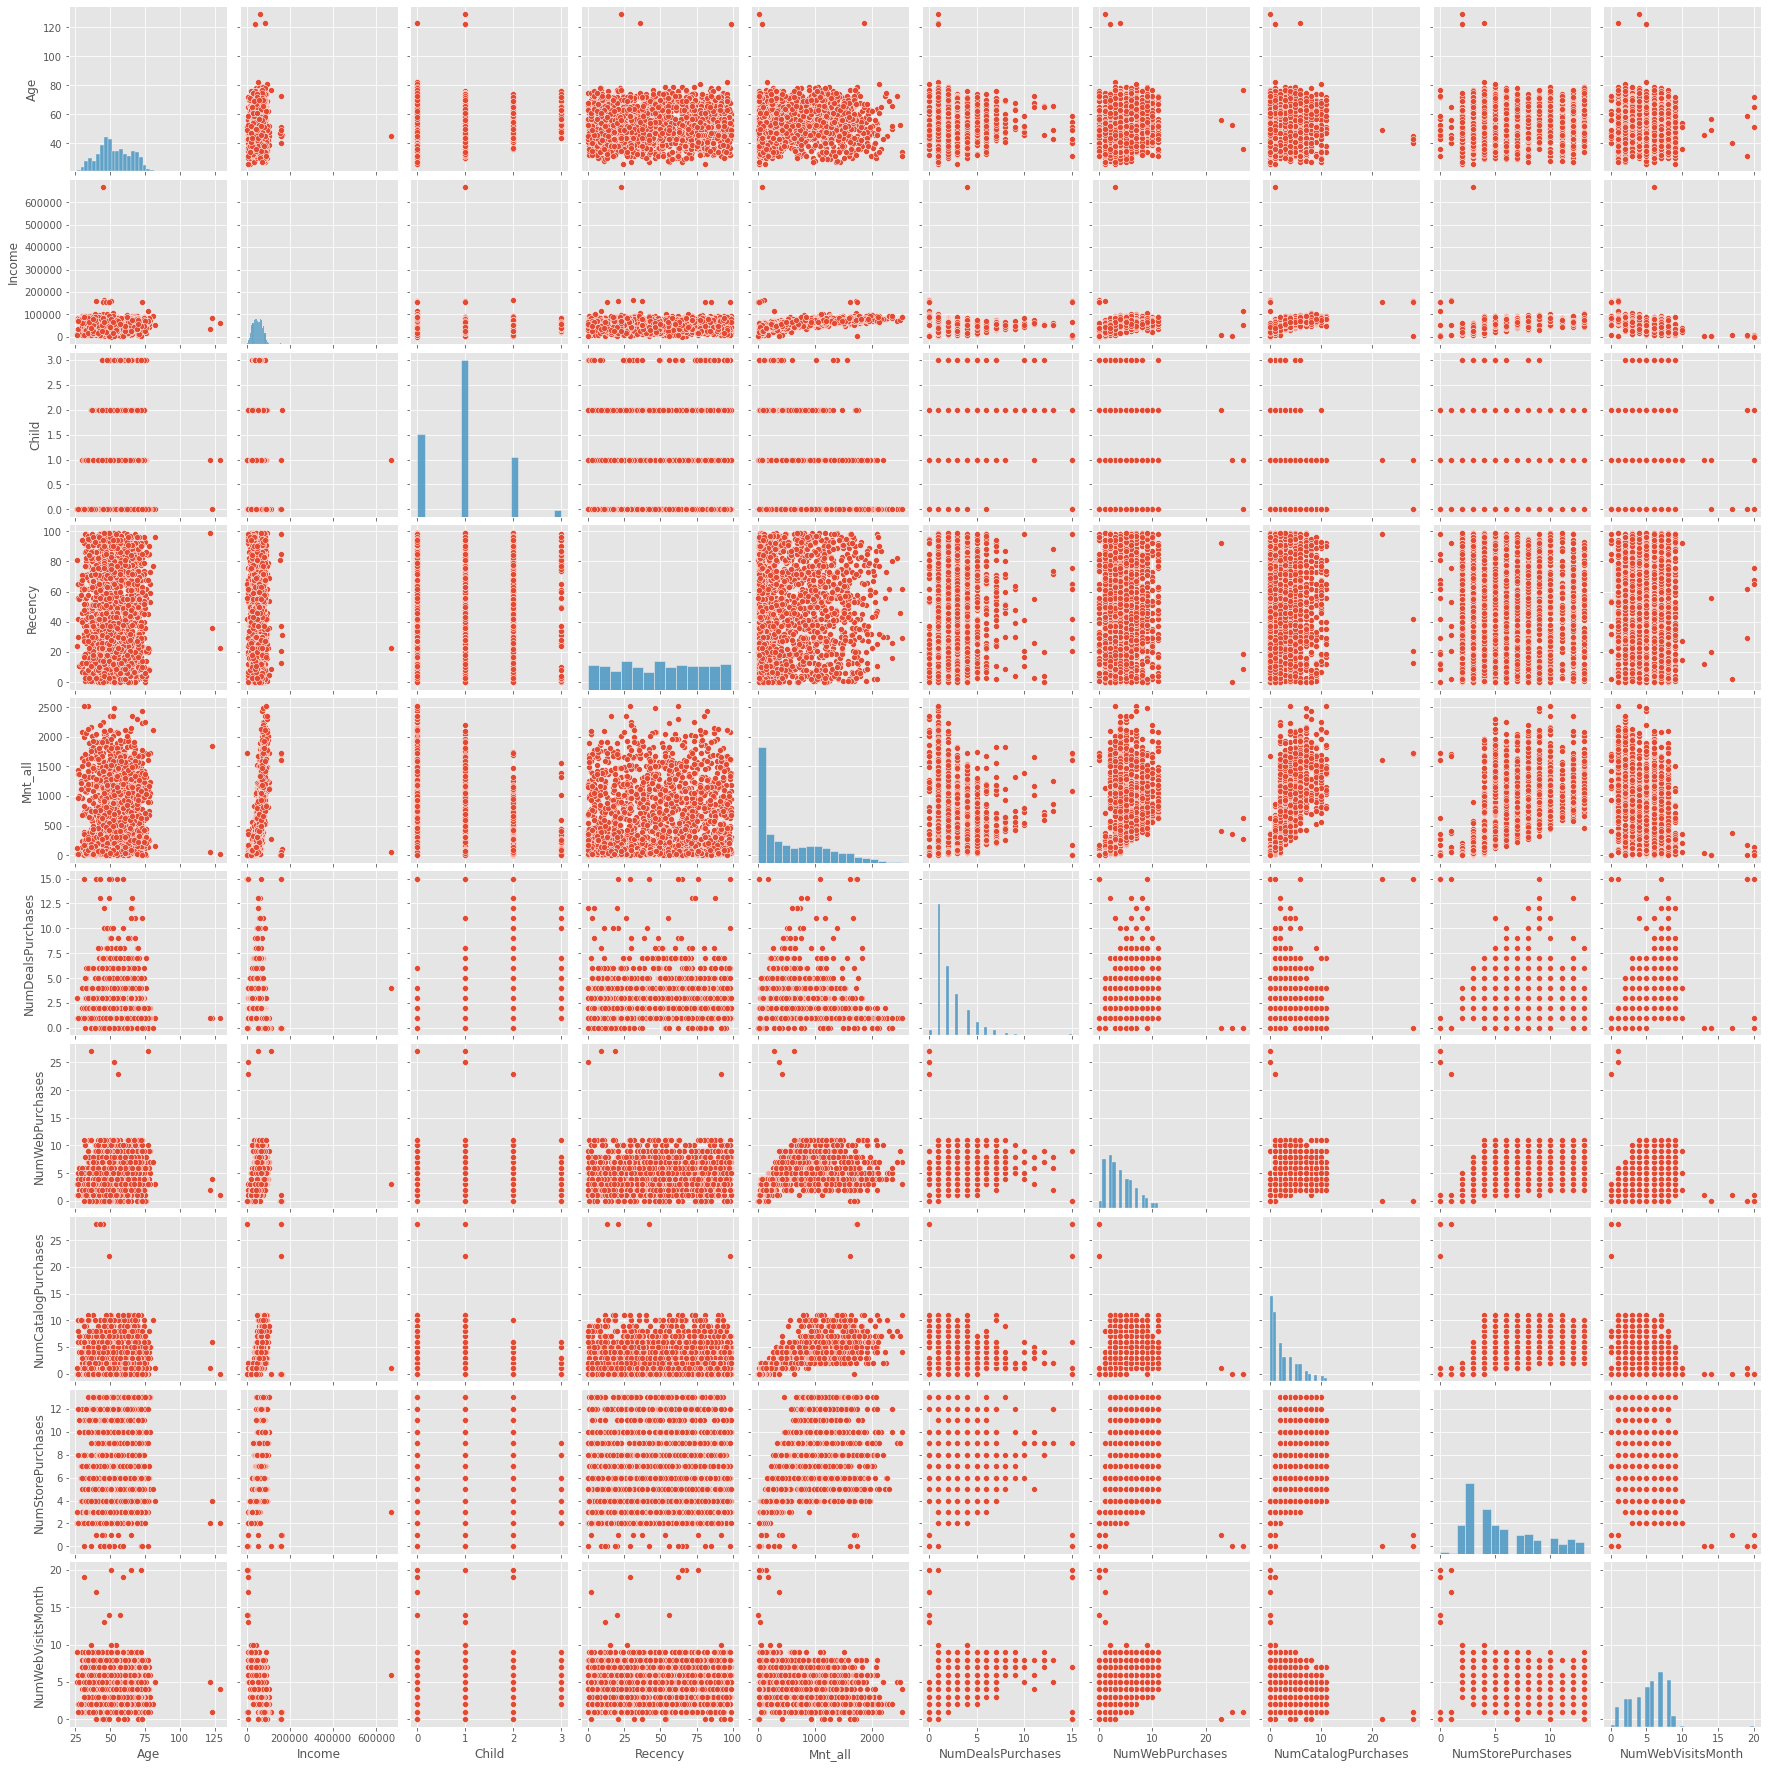

In [12]:
sns.pairplot(df.loc[:,['Age', 'Income', 'Child', 'Recency', 'Mnt_all', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])

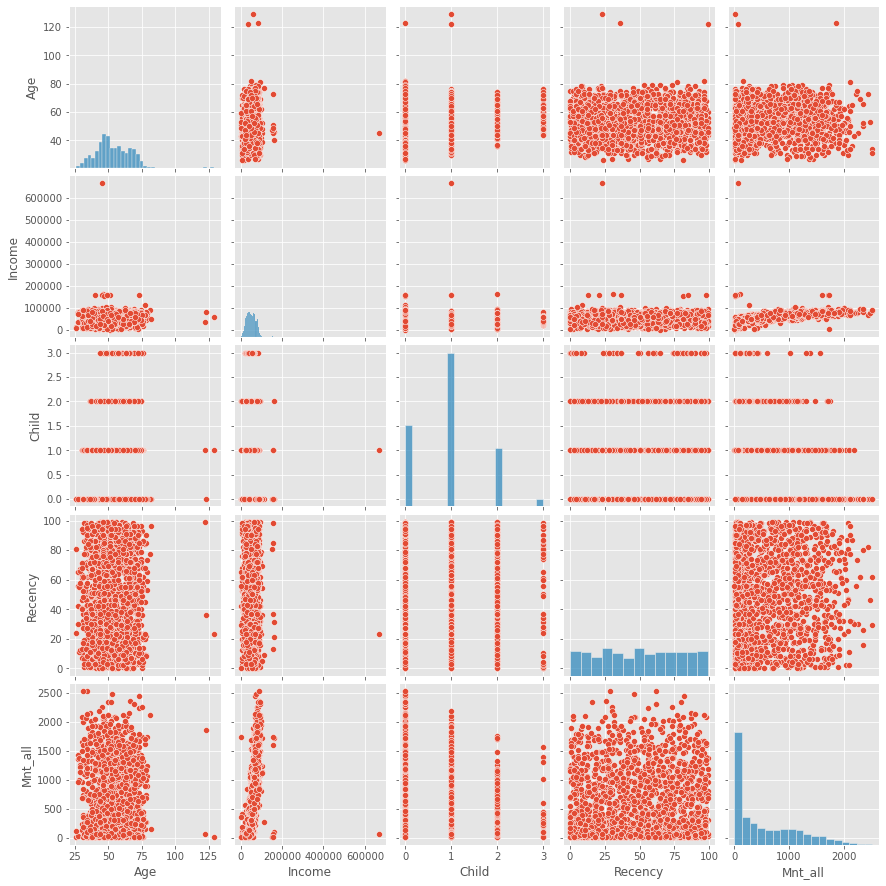

In [13]:
# Однако данную таблицу сложно анализировать, так как она очень мелкая. Можно проанализровать категорию параметров 'Num...smth' другим способом далее. 
sns.pairplot(df.loc[:,['Age', 'Income', 'Child', 'Recency', 'Mnt_all']])

In [14]:
#выбросы нашлисы у следующих переменных: Income , Age. Удалим выбросы
df = df[(df['Age']<90)]             # выбираем границу в 90, так как основные выбросы в районе 125, и один около 75. берем максимально разумный возраст. не 80, так как на графике не понятно значение выброса около 75. 
df = df[(df['Income']<600000)]      # выбираем границу в 600000, так как один выброс дальше 600000, остальные в районе 200000. берем 600000 как последнее круглое значение перед последним выбросом.

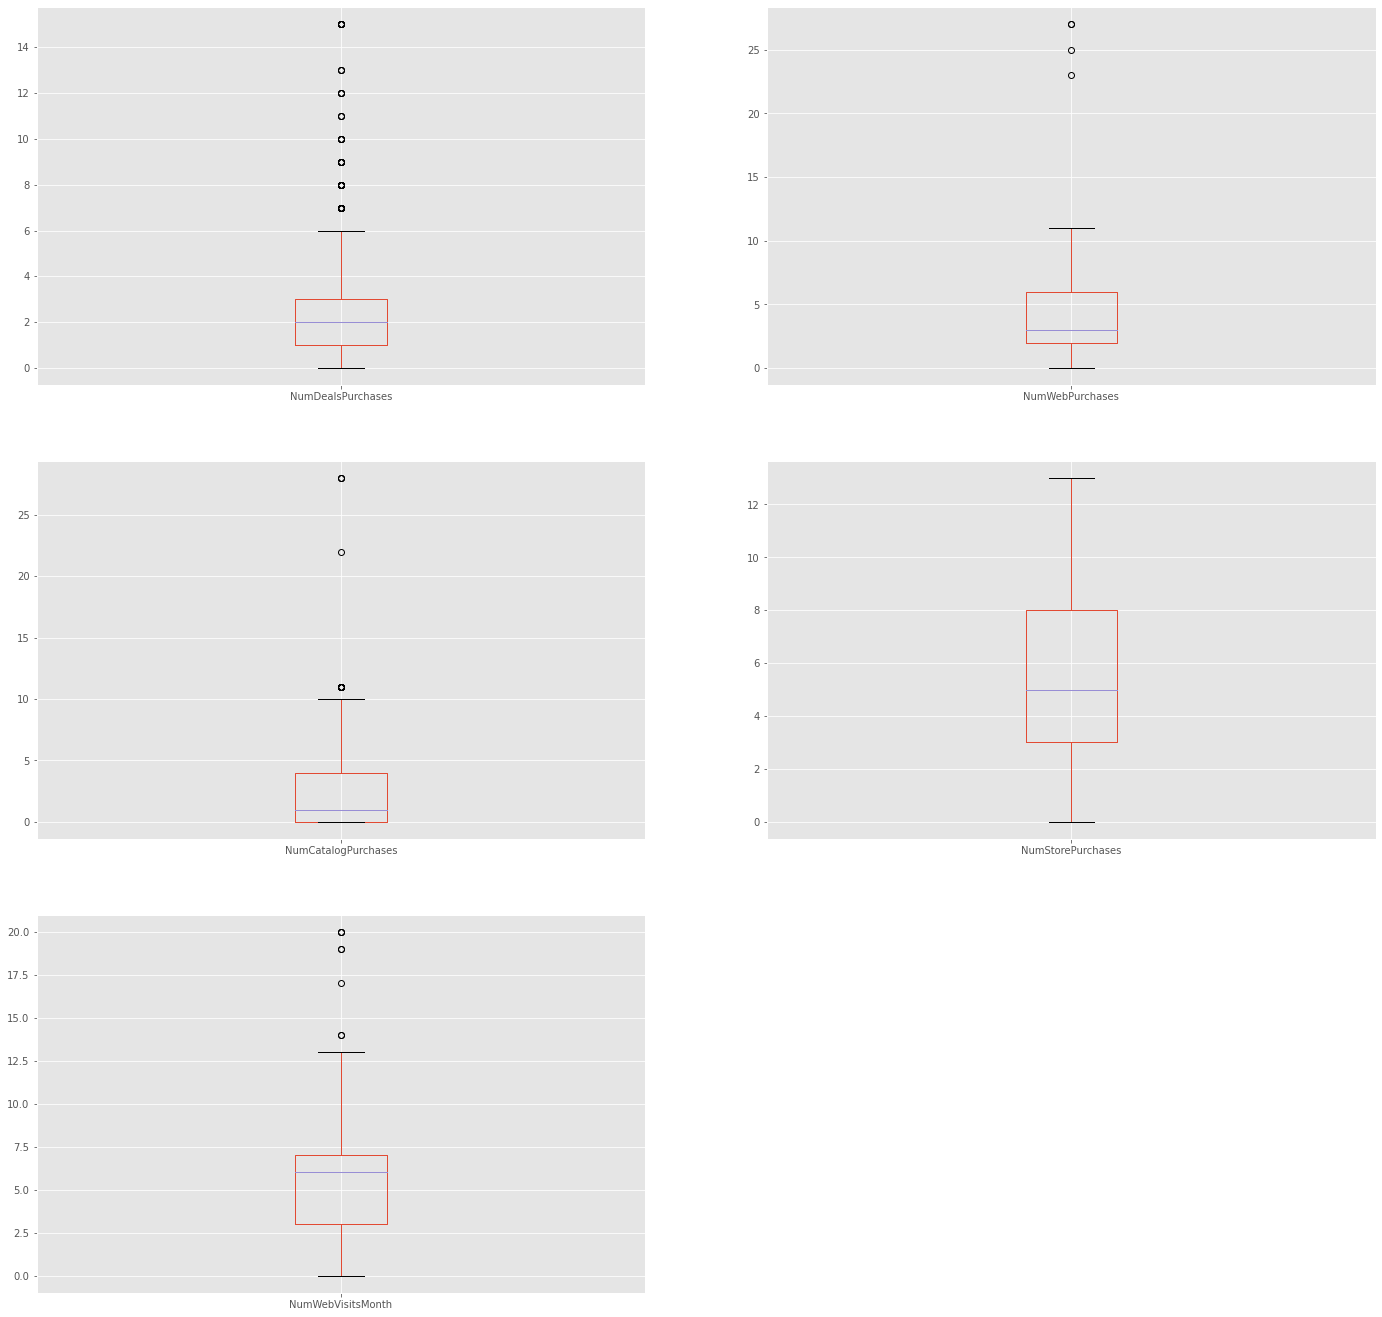

In [15]:
# Далее проанализируем категорию 'Num...+ что-то' на наличие выбросов через boxplot.

#Объединим данные по всей категории 'Num...+ что-то':
Num_smth = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

#стоим графики boxplot по категории Num_smth:
NROWS, NCOLS = 4, 2
plt.figure(figsize=(12 * NCOLS, 8* NROWS))
for i, col in enumerate (Num_smth):
    ax = plt.subplot(NROWS, NCOLS, i + 1)
    df.boxplot(col, ax = ax)

In [16]:
# очистим данную категорию от выбросов. их ярко видно на выше приведенных графиках - это все точки выше верхней границы. 
df = df[(df['NumDealsPurchases']<6.5)]         
df = df[(df['NumWebPurchases']<15)]
df = df[(df['NumCatalogPurchases']<11)]         
df = df[(df['NumWebVisitsMonth']<13)]


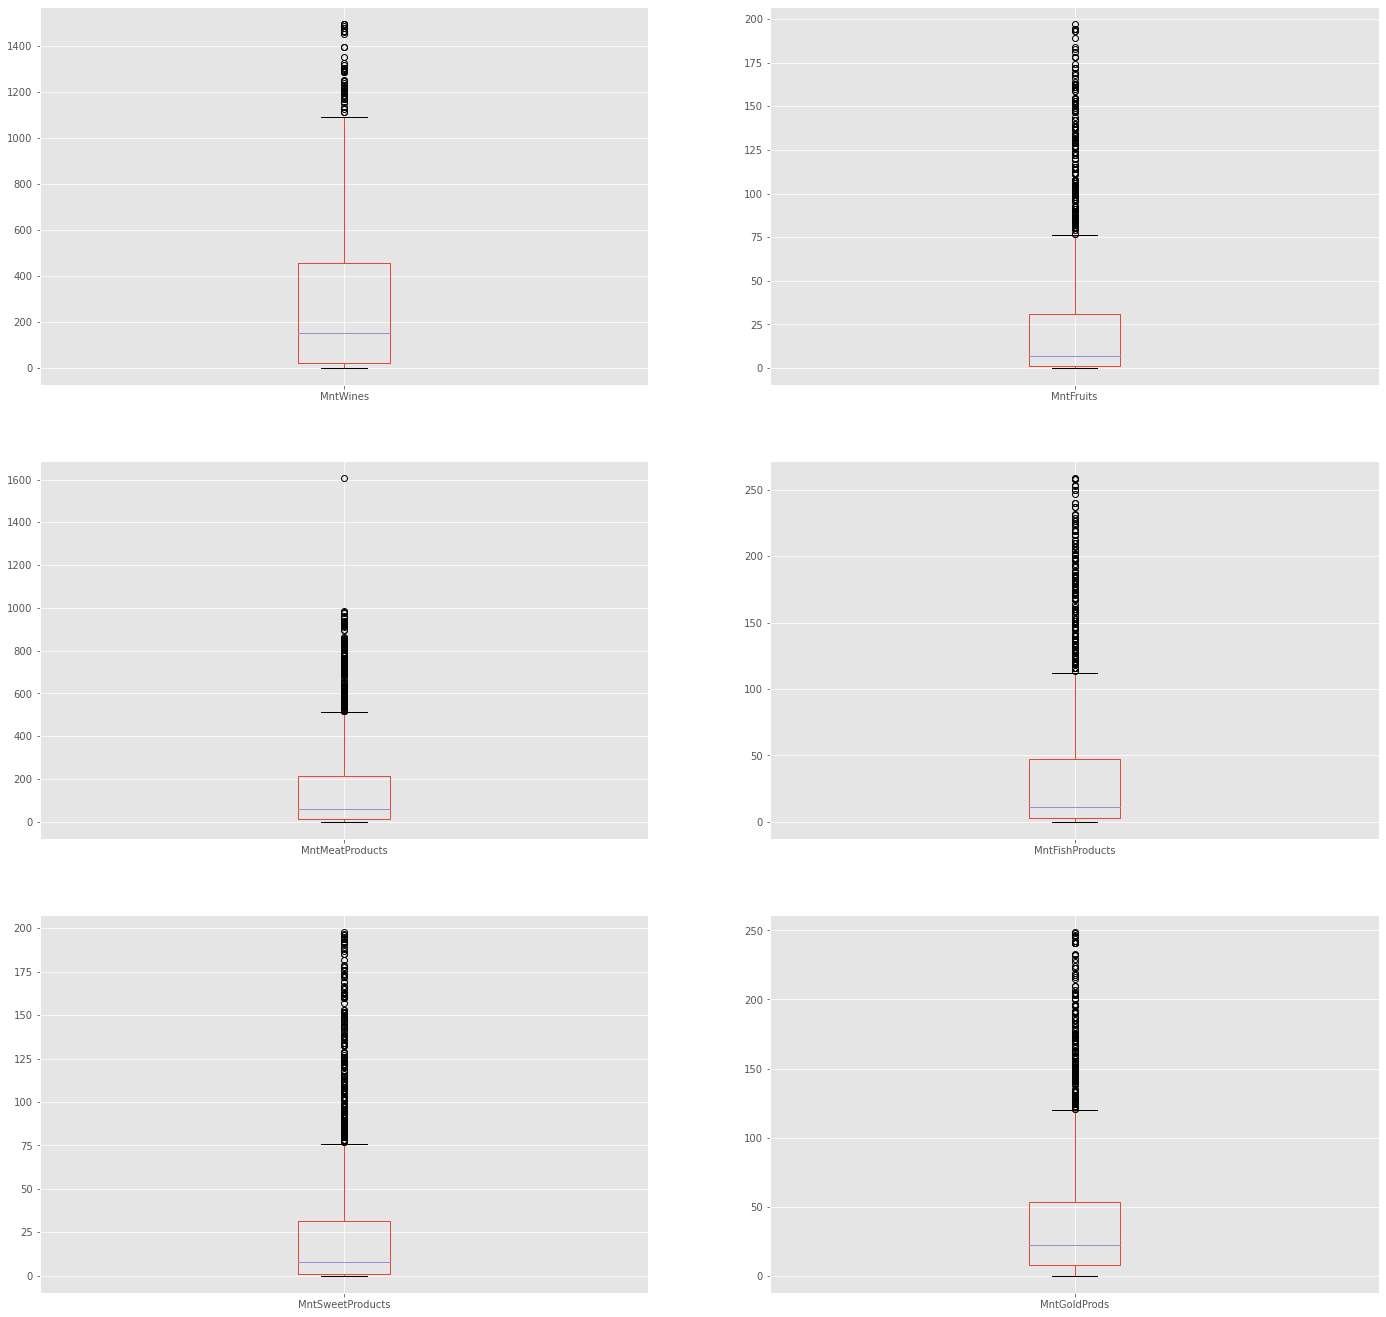

In [17]:
# Также на всякий случай проверим на выбросы категорию параметров. В pairplot данная категория визуально плохо читабельна. Интересно изучить ее подробнее.
Mnt_all = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#стоим графики boxplot по категории Mnt_all:
NROWS, NCOLS = 4, 2
plt.figure(figsize=(12 * NCOLS, 8* NROWS))
for i, col in enumerate (Mnt_all):
    ax = plt.subplot(NROWS, NCOLS, i + 1)
    df.boxplot(col, ax = ax)

In [18]:
# Выбросы есть. Очистим :
df = df[(df['MntWines']<1400)]         
df = df[(df['MntMeatProducts']<1200)]
df = df[(df['MntGoldProds']<240)]           

# Хоть и на всех графиках много выбросов выше 75% квантиля, но они не были удалены. 
# Поскольку во время первой попытки выполнения данной части домашнего задания удаленные выбросы удалялись, но появлялись новые и 75% квантиль смещался езе ниже. 
# При попытке продолжить удалять выбросы, 755 квантиль снижался все ниже, а наблюдаемые значения продалжали уменьшаться.
# Поэтому было принято решение удалить выбросы только от той часть графика, где есть в них разрывы - а именно в параметрах MntWines, MntMeatProducts и MntGoldProds.
        


## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

### Первое разделение - по семейному признаку. 
   #### Люди с парой и одинокие
Вместо того, чтобы делить данные на множество категорий, которые отражают одну и ту же суть, можно сгруппировать их на две общие категории : с парой и без пары.
   #### Семьи с детьми и без детей
В данных есть не только люди с детьми, но и без них. Удобнее было бы сортировать семьи на "Childfree" и "With cild", поскольку семьи с детьми помимо трат на себя, должны также обеспечивать ребенка, что в теории повышает их расходы. 
   
    
### Второе разделение - по уровню образования. 
   #### Образование
В данных очень много видов образования, это затрудняет анализ. данные, принадлежащие одному уровню образования, но названные по-разному, можно было бы объединить.

### Третье разделение - по принятию приглашения. 
  
В данных существует большая категория 'AcceptedCmp...+число', а также переменная 'Response', которые обозначают, в какой именно компании пользователь принял приглашение. Можо было бы создать отдельную переменную, которая показыала бы номер компании, а которой приняли приглашение. 


In [19]:
# Разделим признаки на две категории : без партнера(= 1чел.) и с партнером(= 2 чел.).
df['Status'] = df['Marital_Status'].replace({'Married':'2', 'Together':'2', 'Single':'1', 'Widow':'1', 'Divorced':'1', 'Alone':'1', 'Absurd':'1', 'YOLO':'1'})

# Разделим семьи на категории : без детей и с детьми. Если число 1 или 2, то значит один человек или без пары, но с ребенком. Если 2 и больше, то пара с/без детьми.
df['Families'] = df['Status'].replace({'1': 1, '2':2})+ df['Child']

# Разделим людей на категории по уровню образования: 1 - низкий,  2 - средний, 3 - высокий.
df['Education'] = df['Education'].replace({'Basic':'1','2n Cycle':'1', 'Graduation':'2', 'Master':'3', 'PhD':'3'})

# Разделим людей на категории по уровню образования: 1 - низкий,  2 - средний, 3 - высокий.


#Удалим лишний столбик
df = df.drop(columns='Marital_Status')

In [20]:
df.head()

,ID,Age,Education,Income,Child,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Mnt_all,Member,Status,Families
1503,0,37,2,70951.0,0,2013-05-04,66,239,10,554,...,0,0,0,0,0,SA,1198,0.0,2,2
1956,9,47,3,46098.0,2,2012-08-18,86,57,0,27,...,0,0,0,0,0,CA,120,0.0,1,3
1311,13,75,3,25358.0,1,2013-07-22,57,19,0,5,...,0,0,0,0,0,SA,32,0.0,1,2
2052,20,57,1,46891.0,1,2013-09-01,91,43,12,23,...,0,0,0,0,0,GER,183,0.0,2,3
2237,22,46,2,46310.0,1,2012-12-03,99,185,2,88,...,0,0,0,0,0,SP,309,0.0,1,2


## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

#### Категориальные переменные (качествернные - номинальные и порядковые):
1. ID - поскольку это столбик из уникальных значений, каждое из которые принадлежит одному конкретному нашему клиенту
2. Education - текст, означающий полученную степень образования (ранговая переменная)
3. Dt_Customer - дата регистрации у каждого клиента своя, но бывает, что повторяется. это почти тоже самое, что и id у клиента.
4. Country - текст, означающий страну проживания клиента (каждая из представленных стран может быть закодирована в конкретный числоваой код)
5. Status - статус клиента, текст, также можно закодировать в число (No_Partner - например 1, With_Partner - например 2)
6. AcceptedCmp1, AcceptedCmp2,	AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 - текст, закодированный в числа 0 или 1.
7. Response - тоже некий текст, закодированный в числа 0 и 1. 
8. Complain - текст, закодированный в числа  0 и 1 
9. Member - текст, закодированный в числа 0 или 1.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 1503 to 261
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1966 non-null   int64         
 1   Age                  1966 non-null   int64         
 2   Education            1966 non-null   object        
 3   Income               1966 non-null   float64       
 4   Child                1966 non-null   int64         
 5   Dt_Customer          1966 non-null   datetime64[ns]
 6   Recency              1966 non-null   int64         
 7   MntWines             1966 non-null   int64         
 8   MntFruits            1966 non-null   int64         
 9   MntMeatProducts      1966 non-null   int64         
 10  MntFishProducts      1966 non-null   int64         
 11  MntSweetProducts     1966 non-null   int64         
 12  MntGoldProds         1966 non-null   int64         
 13  NumDealsPurchases    1966 non-n

In [22]:
# Также следует разделить параметр Dt_Customer на года и месяца, чтобы узнать в какой год и месяц зарегистрировалось больше пользователей.
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month

In [23]:
#для дальнейшего удобства приведем ID, AcceptedCmp, Response и Complain к типу данных object, соответствующий категориальным переменным.
df['ID'] = df['ID'].astype('object')
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype('object')
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype('object')
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype('object')
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype('object')
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype('object')
df['Response'] = df['Response'].astype('object')
df['Complain'] = df['Complain'].astype('object')
df['Year'] = df['Year'].astype('object')
df['Month'] = df['Month'].astype('object')

In [24]:
df.describe(include='object')

,ID,Education,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Member,Status,Year,Month
count,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966,1966.0,1966,1966,1966
unique,1966,3,2,2,2,2,2,2,2,8,7.0,2,3,12
top,0,2,0,0,0,0,0,0,0,SP,0.0,2,2013,5
freq,1,989,1879,1846,1864,1866,1949,1761,1948,971,1542.0,1274,1053,193


##### Анализ описательной статистики для категориальных переменных:
1. Отутствуют выбросы : для каждой из переменных существует 2121 наблюдений.
2. В колонке 'ID' каждое наблюдение уникально, поэтому count = 2121, нет наиболее часто встречающегося значения (top=0, freq=1)
3. В колонке 'Dt_Customer' 658 уникальных дат регистрации, наиболее популярная дата: 2012-08-31 (12 зафиксированных регистраций)
4. В колонке 'Education' уникальных наблюнений 3, а наибошлее часто встречающийся (1064 раза) уровень образования клиента это B-Level (Graduation).
5. В категории переменных 'AcceptedCmp...+ число' всего 2 уникальных значения - это 0 и 1. В каждой из переменных, входящих в эту категории наиболее часто повторяющееся значение - это 0 ( в 'AcceptedCmp1'- 1985 раза, в 'AcceptedCmp2'- 2092 раза, в 'AcceptedCmp3'- 1965 раза, в 'AcceptedCmp4'- 1964 раза, в 'AcceptedCmp5'- 1966 раза). Получается, чаще всего клиент принимал предложение в четверной компании ('AcceptedCmp4' - 157 раз приняли), а чаще всего отвергал предложение во второй компании ("AcceptedCmp2" - 2092 раза отвергли). 
6. В колонке 'Response' также только 2 уникальных значения (0, если клиент отверг предложение в последней компании и 1, если клиент принял предложение в последней компании). 308 раз приняли предложение в последней компании. То есть в последней компании даже чаще принимали предложение , чем в четвертой компании 'AcceptedCmp4'.
7. В колонке 'Complain' всего 2 уникальных значения (0 - если в течение 2х последних лет не было жалоб и 1, если были). Наиболее часто встречается значение 0, то есть жалоб нет (2102 раза), и 19 жалоб поступило (2121 - 2102 = 19).
8. В колонке 'Country' свтречается 8 значений (стран), самая популярная страна проживания среди клиентов - SP, встречается 1094 раза.
9. В колонке 'Status' встречается 2 значения : 'With_Partner' и 'No_Partner'. Наиболее часто встречающийся статус клиента - 'With_Partner'.
10. В колонке 'Member' встречается 7 уникальных значений, то есть от 0 (не приняли предложение ни в одной компании) до 6 (приняли предложение в последней компании). Наиболее часто встречающееся значение - это 0, значит наибольшая часть пользователей не приняла ни в одной компании предложение. 


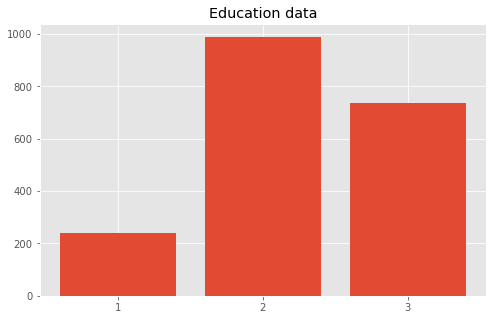

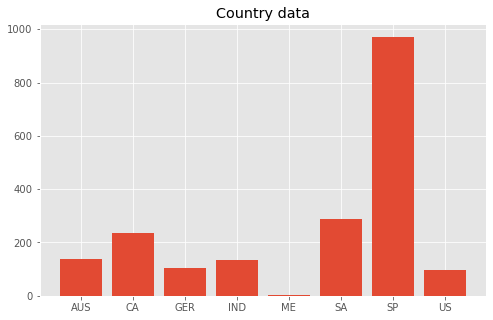

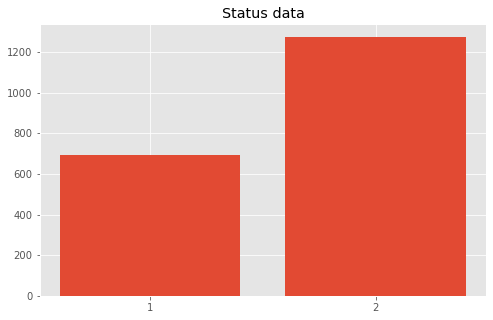

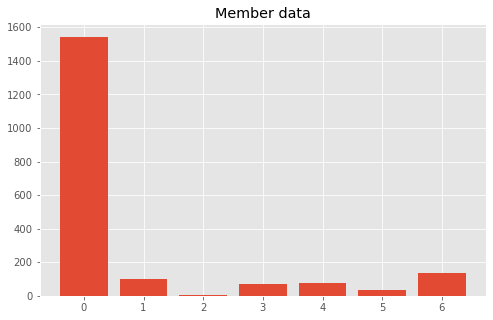

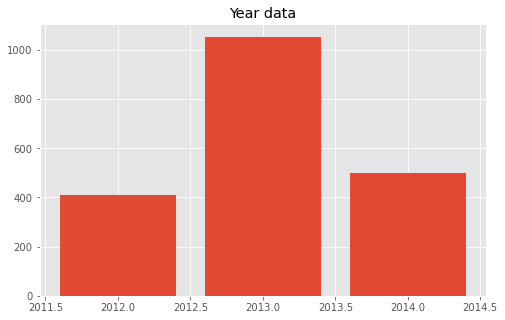

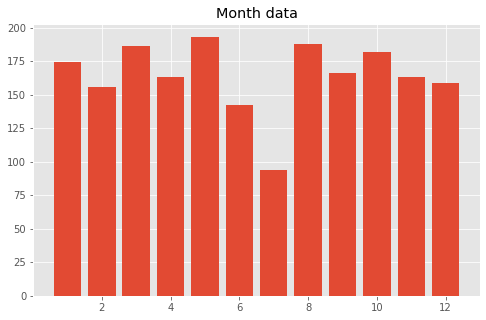

In [25]:
# Напишем функцию, которая будет строить графики по отдельно заданной нами категории. 
# Выберем только те категориальные переменные, где очень мало значений. 

S_CAT_FEATURES = ['Education', 'Country', 'Complain', 'Status', 'Member','Year', 'Month' ]
def draw_cat_freqs(data, column):
    values, counts = np.unique(data[column], return_counts=True)
    plt.figure(figsize=(8, 5))
    plt.bar(values, counts)
    plt.grid(which='minor', color='white')
    plt.title(f'{column} data')

draw_cat_freqs(df, 'Education')
draw_cat_freqs(df, 'Country')
draw_cat_freqs(df, 'Status')
draw_cat_freqs(df, 'Member')
draw_cat_freqs(df, 'Year')
draw_cat_freqs(df, 'Month')

#### Функция показывает как много мы имеем предлавителей той или иной группы: уровень образования, жители страна, статус (пара/одинок). 
По графикам видно, что:
1. Основная часть аудитории имеет средний уровень образования.
2. Меньше всего пользователей из страны ME, а больше всего из SP.
3. Среди всех пользователей сервиса в два раза больше людей с парой. 
5. Больше всего пользователей приняли не приглашение, однако среди принявших приглашение пользователей больше от компании номер 6. (Response), а меньше всего от компании номер 2 (AcceptedCmp2).  
7. Больше всего пользователей зарегистрировалось в сервисе в 2013 году.
8. Больше всего регистраций в сервисе происходит в 5 месяц, меньше всего в 7 месяц.

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

#### Количественные переменные :
1. Age - возраст клиента 
2. Child - количество детей в семье
3. Income - доход клиента
4. Recency - количество дней, прошедших со дня последней покупки
5. Mnt_smth - сумма, потраченная в сервисе за 2 года (не будем рассматривать, будем детально анализировать каждый из параметров, входящих в данную категорию)
6. NumWebVisitsMonth - количество посещений в месяц        
7. Families - содержит данные о численном составе семей.
8. NumDealsPurchases - количество купленных товаров, совершенных со скидкой
9. NumCatalogPurchases - количество купленных товаров, совершенных с использованием каталога
10. NumStorePurchases - количество купленных товаров, совершенных непосредственно в магазинах
11. NumWebPurchases - количество купленных товаров, совершенных через веб-сайт компании
12. MntWines - сумма, потраченная на винодельческую продукцию за последние 2 года
13. MntFruits - сумма, потраченная на фруктовые продукты за последние 2 года
14. MntMeatProducts - сумма, потраченная на мясную продукцию за последние 2 года
15. MntFishProducts - сумма, потраченная на рыбопродукты за последние 2 года
16. MntSweetProducts - сумма, потраченная на сладкие продукты за последние 2 года
17. MntGoldProds - сумма, потраченная на золотые изделия за последние 2 года

In [26]:
df.describe(include='float64')

,Income
count,1966.000000
mean,50790.907935
std,20717.794712
min,7500.000000
25%,34451.000000
50%,49973.500000
75%,66832.500000
max,162397.000000


In [27]:
df.describe(include='int')

,Age,Child,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Mnt_all,Families
count,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000
mean,52.971007,0.951679,49.695829,271.774161,25.087487,152.175483,36.385554,25.884028,39.890132,2.101221,3.896745,2.400814,5.731943,5.291455,551.196846,2.599695
std,11.609362,0.729045,28.974448,311.471291,38.545614,207.149775,53.738144,40.189042,47.148460,1.360822,2.563399,2.586140,3.255353,2.259500,574.143364,0.879498
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,45.000000,0.000000,25.000000,21.000000,1.000000,14.000000,3.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,63.000000,2.000000
50%,52.000000,1.000000,50.000000,144.000000,7.000000,56.000000,11.000000,8.000000,21.000000,2.000000,3.000000,1.000000,5.000000,6.000000,310.000000,3.000000
75%,62.000000,1.000000,75.000000,445.750000,30.000000,213.000000,46.000000,31.000000,51.750000,3.000000,6.000000,4.000000,8.000000,7.000000,971.000000,3.000000
max,82.000000,3.000000,99.000000,1396.000000,197.000000,984.000000,259.000000,198.000000,233.000000,6.000000,11.000000,10.000000,13.000000,10.000000,2525.000000,5.000000


##### Анализ описательной статистики для количественных переменных:
1. Отутствуют выбросы : для каждой из переменных существует 2121 наблюдений.

2. Параметр 'Age': средний возраст покупателя 52.9 года (примерно 53 года ), минимальный возраст 26 года, максимальный возраст - 82 года. Медиана (квантиль 50%) равна 52 года, так как среднее значение очень близко к медиане, то значит это нормальное распределение. Стандартное отклонение в 11.74 лет (примерно 12 лет), то есть основная аудитория находится в райлне 50 лет, но разница в возрасте аудитории по 12 лет в среднем. нижний порог (квантиль 25%) равен 44 лет, а верхний (квантиль 75%) равен 63 года. Поскольку сервис доставки еды это относительно новая технология, а аудитория сервиса не молодеж, то возможно можно говорить о том, что средний возраст в стране высокий (40+) или же охватываемые стнаны очень развиты, поэтому приложениями доставки еды пользется не только молодое население, но взрослые и пенсионного возраста люди тоже.

3. Параметр 'Child': среднее количество детей в семье - 0.9 (примерно 1 чел). медиана равна 1 чел. Максимальное число детей в семье - 3 ребенка, а минимальное - 0 детей. Распреденение ненормальное,  так как 50% квантиль совпадает с 75% квантилем и равен 1 чел. Следовательно, преобладающее число детей в семье равняется 1 ребенку.

4. Параметр 'Income': минимальный размер дохода клиента составляет 7 500.00 ден. ед. , а максимальный - 162 397.00 ден.ед. В среднем пользователь сервиса зарабатывает 51 721.679397 ден.ед. Квантиль 50% равен 51 148.00 ден.ед., так как медиана близка по значению к среднему, то имеем нормальное распределение. 

5. Параметр 'Recency': в среднем покупатели покупают товар раз в 49.149929 день (примерно 50 дней). Медиана (квантиль 50%) = 49.0 дней. Поскольку среднее значение близко к медиане, то это нормальное распределение. Также максимальное число прошедших дней со дня последней покупки составляет 99 дней, а минимальное - 0. Значит есть как активные, так и не активные пользователи. 

6. Параметр 'MntWines':	в среднем каждый покупатель тратит 271.77416 ден.ед. на виную продукцию. 25% квантиль равен 21 ден.ед., 75% квантиль равен 445.750 ден.ед. Медиана равна 144.0 ден.ед. Распределение не является нормальным. Стандартное оттклоднение по тратам на вино каждым пользователем равно 311.47129 ден.ед. Максимальная трата на вино пользователем составляет 1396.0 ден.ед., а минимальная 0 ден.ед. 

7. Параметр 'MntFruits': в среднем каждый пользователь покупает фрукты на 25.087487 ден.ед., медианное значение равно 7.0 ден.ед., 75% квантиль равен 30.0 ден.ед. Стандартное отклонение равно 207.149775 ден. ед. Такие данные говорят о том, что есть сильное смещение по тратам на фрукты. Далее рассмотрим это отдельно, возможно в некоторых странах покупают фрукты сильно больше, чем в других, или же по ругим категориям есть различия.

8. Параметр 'MntMeatProducts':	в среднем каждый пользователь покупает мясо на 152.175483 ден.ед., медиана равняется 56.0 ден.ед., 75% квантиль - 213.0 ден.ед. Поскольку медиана очень далека от верхней границы, то значит, есть сильные отклонения по покупке мяса у ряда пользователей сервиса. 

9. Параметр 'MntFishProducts': в среднем каждый пользователь тратит 36.385554 ден. ед. на покупку рыбы через сервис. медиана равна 11.0, 75% квантиль 46.00. Стандартное отклонение равняется 53.7381 ден.ед. Аналогичная ситуация как с двумя предыдущими пунктами. 

10. Параметр 'MntSweetProducts': в среднем каждый покупатель тратит на сладкие продукты 25.8840 ден. ед., медиана равна 8.00 ден.ед., 75% квантиль равен 71.00 ден.ед.. Макимальная трата на сладкое равна 198.0 ден. ед.

11. Параметр 'MntGoldProds': в среднем каждый пользователь таратит на золотые изделия 39.890132 ден.ед., медиана равна 21.0 ден.ед., верхняя граница - 51.750 ден.ед., нижняя - 8 ден.ед.. 

12. Параметр 'NumDealsPurchases': среднее количество покупок совершенных со скидкой по всем пользователям составляет 2.081565 покупок (примерно 2 покупки на 1 пользователя). То есть скидками пользуются почти все пользователи, но редко, скорее всего, если бы скидки были выгодными, то ими пользовались чаще. Медиана таже равна 2.00, что говорит о нормальном распределении. Минимальное значение равно 0, а максимальное равно 6 покупкам. Квантиль 25% = 1, а квантиль 75% - 3 покупкам. Стандартное отклонение равно 1.363418. Значит поетнциально можно увеличить регулярность совершенных покупок со скидкой, если повысить выгоду для клиента с совершаемой операции. 

13. Параметр 'NumWebPurchases': среднее количество покупок совершенных через веб-сайт каждым из всех клиентов равно 3.977841 (примерно 4 покупки). Медиана равна 3 покупкам. Медиана смещена ближе к 25% квантилю. Распреденение ненормальное. Максимальное количество покупок, совершенных одним пользователем через веб-сайт, составляет 11 раз, а минимальное равно 0 раз. Нижний квантиль 25% равен 2, а верхний 75% - 6 покупкам. Стандартное отклонение 2.591710 (примерно 2 или 3 покупки, в звимимости от того, в какую сторону округлять). Таким образом, регулярность покупки через веб-сайт выше, чем через предложение по скидке. Медиана смещена ближе к 25% квантилю. 

14. Параметр 'NumCatalogPurchases': среднее количество покупок, совершенных с использованием каталога каждым из клиентов равно 2 покупкам, медиана равна 2.554455 (примерно 2 или 3 покупки, в звимимости от того, в какую сторону округлять), при этом их значения почти совпадают, а значит, что распределение нормально. Минимальное значение совпадает с квантилем 25% и равно 0 покупок. Квантиль 75% равен 4 покупкам. Максимальное число покупок совершенных одним пользователем через  каталог равно 10 покупкам. Таким образом, сервису есть смысл развивать свой каталог, так как им пользуются клиенты.  

15. Параметр 'NumStorePurchases': среднее количество покупок, совершенных непосредственно в магазинах каждым из клиентов равно 5.779349 (примерно 6 покупок), в то время как медиана равна 5, поскольку оба значения близки друг к другу, то распределение нормальное. Минимальное число покупок а магазине равно 0 , а максимальное 13 покупок, стандартное отклонение равно 3.249582 (примерно 3 покупки). Нижний квантиль 25% равен 3 , а верхний квантиль 75% равен 8 покупок.

16. Параметр 'NumWebVisitsMonth': среднее число посещений веб-сервиса за месяц каждым из клиентов составляет 5.251297 (примерно 5) посещений. Медиана (50% квантиль) смещена к 75% квантилю: мадиана равана 6, а 75% квантиль равен 7 посещениям. Распреденение ненормальное. Квантиль 25% равен 3-м посещениям. Стандартное отклонение равно 2.284800. Минимальное число посещений клиентом сервиса составляет 0,а максимальное равно 10 посещений. Таким образом, клиенты довольно часто посещают сервис (медиана близка к верхнему квантилю и не сильно превосходит среднее значение)

17.  Параметр 'Families': чисенный состав семьи в среднем равняется 2.566714 (можно округлить до 2 или 3 человек). Медиана равна 3 людям, 50% квантиль совпадает с 75% квантилем. Распреденение ненормальное. 25% квантиль равен 2 чел. Максимальная численность семьи составляет 5 человек (то есть 2 родителя и 3 ребенка). Минимальное число людей в семье равно 1 человеку, а поскольку стандартное отклонение равно 0.884033, то скорее всего семей из 1 человека много. 

18. Параметр 'Mnt_all': средняя сумма потраченная в сервие за 2 года каждым из клиентов равна 353.00 ден.ед., минимальная сумма = 6 ден.ед., а максимальная = 2 525.00 ден. ед. Нижний квантиль 25% равен 66.00 ден.ед., а верхний 75% равен 1 038.00 ден.ед. То есть разброс довольно большой. Медиана также не совпадает со средним значением и равна 595.891089 ден.ед., значит распределение не нормальное. Стандартное отклоение равно 604.540483 ден.ед. Далее можно будет построить график для лучшей визуализации. 


Таким образом, одними из самых доходных каналов сервиса является в первую очередь точка магазина, далее веб-сайт,а на третьем месте это каталог. Основная аудитория сервиса пользователи 40 лет и выше. В среднем в каждой из семей имеется по 1 ребенку. Большее число пользователей посещают сервис более 5 раз в месяц. Данные о тратах на продукты питания сильно смещены и разбросаны по ряду критериев (страна или тип семьи, что-то другое), рассмотрим их далее. 

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [28]:
#объединим количество покупок в одну категорию, не включая в нее количество посещений 'NumWebVisitsMonth':
df['Num_Purchases'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

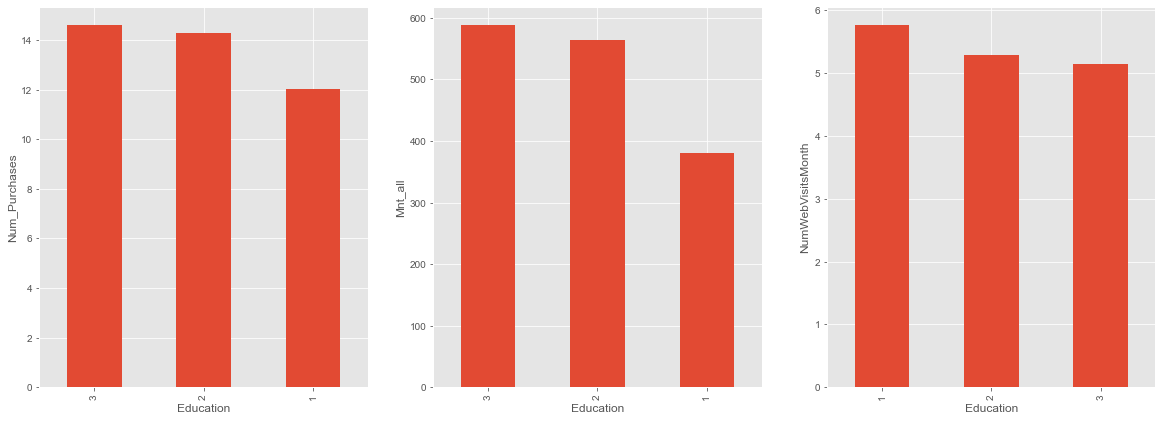

In [29]:
# Посчитаем среднее значение для количественных переменных Num_Purchases, Mnt_all и NumWebVisitsMonth.
# Для этого группируем данные по образованию:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
gb = df.groupby('Education')[['Num_Purchases', 'Mnt_all', 'NumWebVisitsMonth']].mean()
gb['Num_Purchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[0], ylabel ='Num_Purchases')
gb['Mnt_all'].sort_values(ascending=False).plot(kind='bar', ax=ax[1], ylabel='Mnt_all')
gb['NumWebVisitsMonth'].sort_values(ascending=False).plot(kind='bar', ax=ax[2], ylabel='NumWebVisitsMonth')
sns.set_style('white')


#### Анализ описательной статистики для данных, сгруппированных по образованию:
График 1. Num_Purchases и Education.

    1) В среднем у клиентов с более высоким уровнем образования количество покупок выше, чем у клиентов с более низким уровнем образования.
    2) Чем выше уровень образования, тем больше покупок.
    3) Среднее количество покупок, совершенных сервисе у людей с высоким уворнем образование (3) примерно 15 шт., у людей со средним (2) примерно 14 шт., у людей с низким уровнем (1) примерно 12 шт.
    
График 2. Mnt_all и Education.

    1) Сумма, потраченная в сервисе за 2 года у клиентов с высоким уровнем образования примеро такая же как у клиентов со средним уровнем образования, и сильно выше, чем у клиентов с низким уровнем образвоания.
    2) Чем выше уровень образования, тем больше покупок.
    3) Средняя сумма, потрачеснная в сервисе за 2 года у людей с выскоким уровнем примерно 630 ден. ед., у людей со средним примерно 610 ден. ед., у людей с низким уровнем образования примерно 390 ден. ед.
    
График 3. NumWebVisitsMonth и Education.

    1) Люди с низким уровнем образования пользуются сервисом чаще. Люди с высоким и средним уровнем образования пользуются сервисом с примерно одинаковой частотой.
    2) Среднее количество посещений сервиса в месяц у клиентов с низким уровнем (1) примерно 5,8 раз (или округляем до 6). У остальных примерно по 5,2 раз (или можно округлить до 5).
    
 Таким образом, больше всего прибыли приносят клиенты с высоким уровнем оразования, но посещают сайт они очень редко. Люди со средним уровнем образования средние по всем параметрам, также они составляют основную аудиторию аудиторию сервиса. Люди с низким уровнем образования (скорее всего это дети) реже всех совершают покупки и на самые маленькие суммы, однако чаще всех сидят на сервисе. То есть новые программы для клиентов должны быть направлены на клиентов с высоким, в большую степень со средним уровнем образования. 

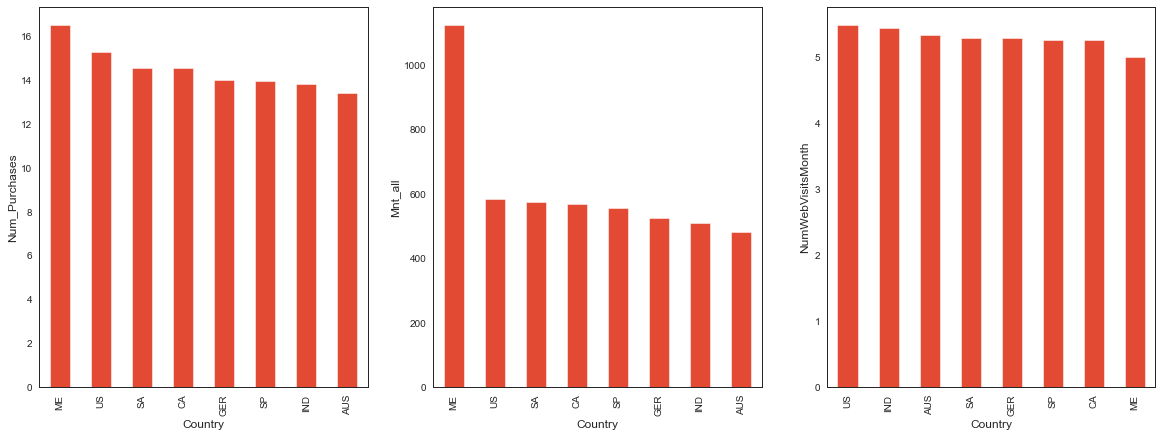

In [30]:
# Посчитаем среднее значение для количественных переменных Num_Purchases, Mnt_all и NumWebVisitsMonth.
# Для этого группируем данные по стране:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
gb = df.groupby('Country')[['Num_Purchases', 'Mnt_all', 'NumWebVisitsMonth']].mean()
gb['Num_Purchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[0], ylabel ='Num_Purchases')
gb['Mnt_all'].sort_values(ascending=False).plot(kind='bar', ax=ax[1], ylabel='Mnt_all')
gb['NumWebVisitsMonth'].sort_values(ascending=False).plot(kind='bar', ax=ax[2], ylabel='NumWebVisitsMonth')
sns.set_style('darkgrid')


#### Анализ описательной статистики для данных, сгруппированных по странам:
График 1. Num_Purchases и Country.

    1) В среднем количество покупок в стране ME выше, чем в других странах: в ME кол-во покупок примерно 19,8 (можно округлить до 20)
    2) Самое низкое число покупок в стране ND: примерно 13. На графике плохо видно, но можно сказать, что число покупок в AUS такое же как и в ND и равно  13. 
    3) Такая же ситуация наблюдается и в странах CA, SA и GER - примерно по 14,9 (можно округлить до 15).
    4) На втором месте по частоте покупок стоит страна US - примерно 15,2 покупок (можно окгулить до 15, но в US все рано больше среднее число покупок, чем в странах CA, SA и GER).
    5) Среднее число покупок с стране SP превышает страны AUS и ND, но меньше, чем в остальных странах, и равно примерно 14-ти покупкам. 
    
График 2. Mnt_all и Country.

    1) Самый большой средний чек за 2 годы в стране ME и составляет немного больше 1000 ден. ед. 
    2) На прошлом графике на втором месте была страна US, но теперь, по среднему чеку, данная страна на 5 месте со средним чеком в 600 ден. ед. 
    3) Теперь же на втором месте находится страна SA, ее средний чек примерно 615 ден. ед. По критерию "среднее число покупок" страна SA совпарадет со странами CA и GER, но критерий "средний чек" в стране SA немного превышает страны CA и GER. 
    4) Средяя сумма покупок в странах CA и GER на первый взгляд совпадает и равняется примерно 605. То есть страны CA и GER в большей степени схожи, чем тройка стран SA, CA и GER.
    5) Средний чек страны SP чуть менше 600 ден. ед. 
    6) Хоть количество покупок в странах AUS и ND совпадет, то средний чек страны AUS выше, чем в ND.
    
График 3. NumWebVisitsMonth и Country.

    1) Как и по всем критериям, по критерию "Число посещений сервиса за месяц" страна ME на первом месте. Месячное число песещений равняется 6 разам. Можно сделать вывод, что срана самая богатая из всех анализируемых. Имлм же в данной стране услуги сервиса более выгодняе, чем представлены в других странах, но данный вариант менее вероятен. 
    2) На втором месте находится страна US. Можно сделать вывод, что в данной стране пользуются сервисом чаще, совершают больше покупок, но на маленький чек.
    3) Среднее число посещений сервиса в стране ND на третем месте. Таким образом, в данной стране заходят в сервис чаще, но совершают меньше покупок, средний чек также самый маленький среди всех стран. Возможно для данной страны сервис привлекательный, что застравляет клиентов заходить на сервис часто, но стоимость товаров сильно высокая, что влияет на маленькое число покупок и на низий средний чек.
    4) Среднее число посещений в странах CA, SP, SA примерно одинаковое.
    СA чаще совершает покупки и посещает сервис, но средний чек ниже чем в SA и выще чем в SP. 
    SA совершают чаще покупки чем в SP, но ниже чем CA. Средний чек самый высокий, а посещение сервиса самое низкое чем в двух других стронах. 
    Среди этих трех стран SP меньше всех совершает покупки с наименьшим чеком, но посещает сервис чаще, чем SA. То есть среди трех стран SP беднее. Про SA и CA сказать сложно, так как CA заходит на сервис чаще SA, а чек ниже, в то время как SA заходит на сервис реже, но средний чек выше.  
    5) Среднее число посещений в странах AUS и GER также примерно одинаковое, но самое низкое среди всех стран. По всем трем критериям AUS занимает предпослденее место, то есть это скорее всего сама бедная страна из всех (самое низкое песещение сервиса, маленькая регулярность покупок и средний чек). 
    Страна GER имеет среднее число покупок, один из самых высоких средних чеков, и самое низкое число посещений сервиса.

Таким образом, для привлечения больше прибыли, можно было бы сделать больше выгодны предложений для клиентов страны SA, чтобы повысить их средний чек. Сделать более выгодные цены для клиентов из US и ND, так как в US часто покупают на маленькие суммы, а в ND  посещают сайт очень часто, но покупают редко и на маленькие суммы. 

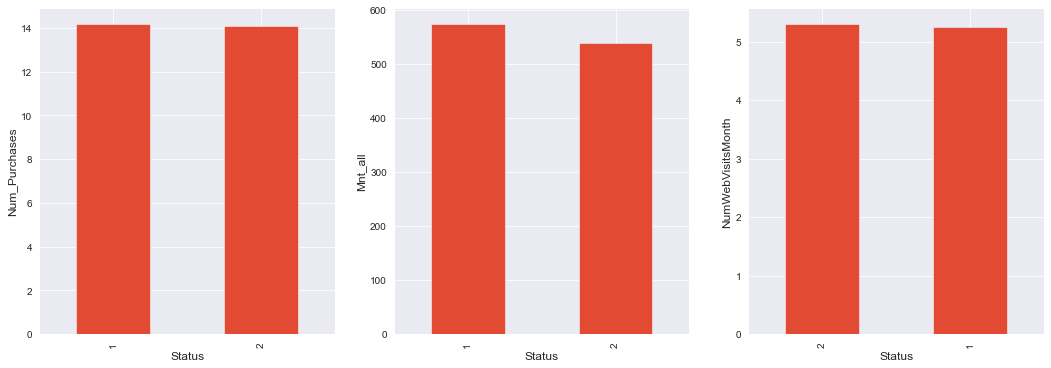

In [31]:
# Посчитаем среднее значение для количественных переменных Num_Purchases, Mnt_all и NumWebVisitsMonth.
# Для этого группируем данные по семейному положению:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
gb = df.groupby('Status')[['Num_Purchases', 'Mnt_all', 'NumWebVisitsMonth']].mean()
gb['Num_Purchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[0], ylabel ='Num_Purchases')
gb['Mnt_all'].sort_values(ascending=False).plot(kind='bar', ax=ax[1], ylabel='Mnt_all')
gb['NumWebVisitsMonth'].sort_values(ascending=False).plot(kind='bar', ax=ax[2], ylabel='NumWebVisitsMonth')
sns.set_style('darkgrid')

Анализ описательной статистики для данных, сгруппированных по образованию:
График 1. Num_Purchases и Education.

Число покупок по категориям "с партнером" и "без партнера" примерно одинаковые, но судя по оси Ох No_Partner стоит раньше With_Partner, а значит все же клиенты без партнера немного чаще совершают покупки: примерно 14 раз по каждой категории.
    
График 2. Mnt_all и Education.

Средний чек за 2 года по категории "без партнера" выше, чем по категории "с партнером", и равнятся примерно 620 ден. ед., а у людей без партнера равняется примерно 580 ден. ед.
    
График 3. NumWebVisitsMonth и Education.
     
Судя по шкале Ох регулярность посещения сервиса у людей с партнером выше, чем у людей без. Однако визуально это не заметно. Обе категории в месяц около 5-ти раз посещают сервис.
    
Таким образом, люди без пары чаще соверщают покупки и на больште суммы, но реже посещают сайт. В то время как пары чаще сидят на сервисе, но реже совершают покупки и на более низкие суммы. 

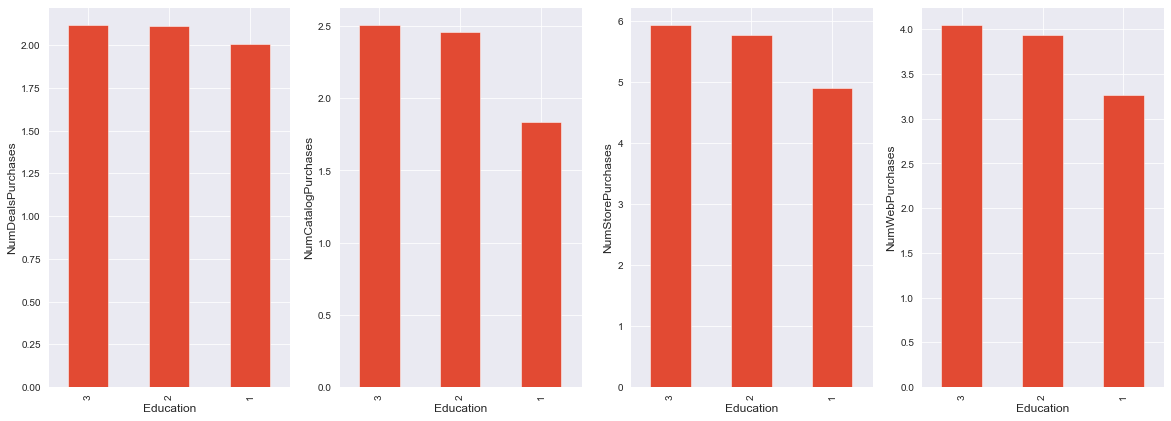

In [32]:
# Для более точного исследования рассмотрим категорию "Num_Purchases" отдельно. 

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,7))
gb = df.groupby('Education')[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].mean()
gb['NumDealsPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[0], ylabel ='NumDealsPurchases')
gb['NumCatalogPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[1], ylabel ='NumCatalogPurchases')
gb['NumStorePurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[2], ylabel ='NumStorePurchases')
gb['NumWebPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[3], ylabel ='NumWebPurchases')
sns.set_style('darkgrid')

#### Основные выводы по "Education VS категория Num_Purchases":
1. Люди с высоким уровнем образования активнее по всем параметрам.
2. Люди с низким уровнем образования самые не активные по всем параметрам.
3. Люди с высоким уровнем образования чаще совершают покупки в магазине, реже всего пользуются скидками.

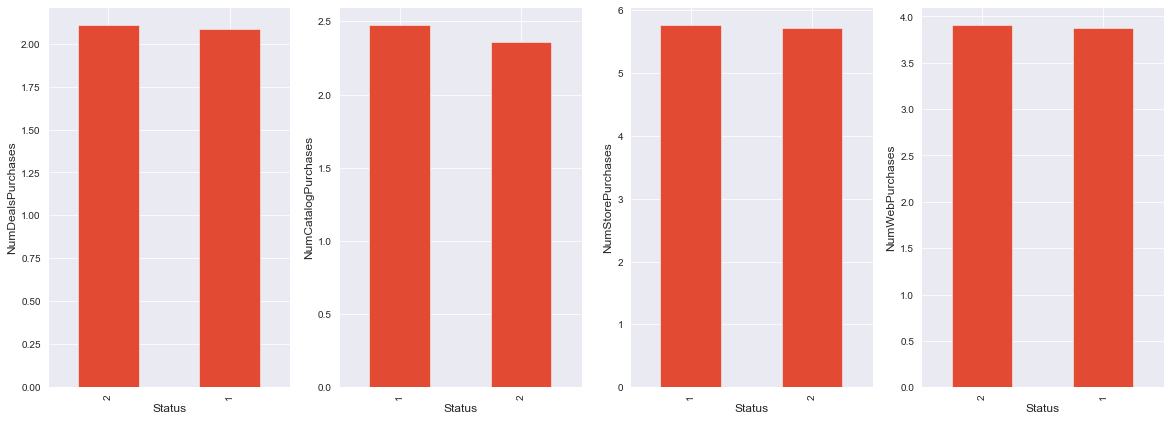

In [33]:

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,7))
gb = df.groupby('Status')[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].mean()
gb['NumDealsPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[0], ylabel ='NumDealsPurchases')
gb['NumCatalogPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[1], ylabel ='NumCatalogPurchases')
gb['NumStorePurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[2], ylabel ='NumStorePurchases')
gb['NumWebPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[3], ylabel ='NumWebPurchases')
sns.set_style('darkgrid')

#### Основыные выводы по "Status VS категория Num_Purchases": 

1. Люди без пары чаще пользуются каталогом
2. Люди с парой чаще совершают покупки через веб-сайт

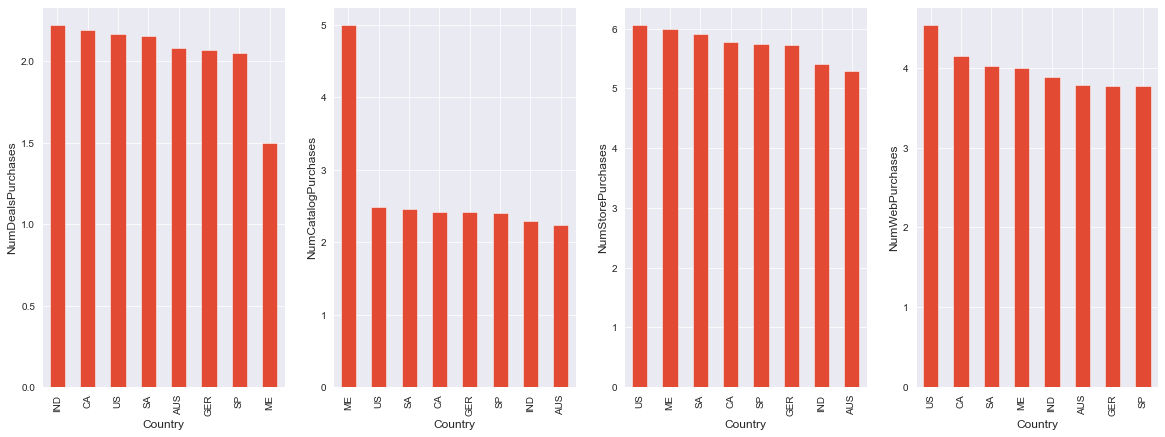

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,7))
gb = df.groupby('Country')[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].mean()
gb['NumDealsPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[0], ylabel ='NumDealsPurchases')
gb['NumCatalogPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[1], ylabel ='NumCatalogPurchases')
gb['NumStorePurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[2], ylabel ='NumStorePurchases')
gb['NumWebPurchases'].sort_values(ascending=False).plot(kind='bar', ax=ax[3], ylabel ='NumWebPurchases')
sns.set_style('darkgrid')

#### Основные выводы по "Country VS категория Num_Purchases":

1. Скидны примерно одинаково популярны со всех странах.
2. Чаще всего каталогом пользуются пользователи из страны ME. В остальных странах примерно одинаково, но есть сильный отрыв. Тоже самое с покупками через веб-сайт.
3. Таким образом, больше всего прибыли приходит от каталога и веб-сайта сервиса. Значит основне предложения в первую очередб нужно продвигать имеено там.

Text(0.5, 1.0, 'MntGoldProds')

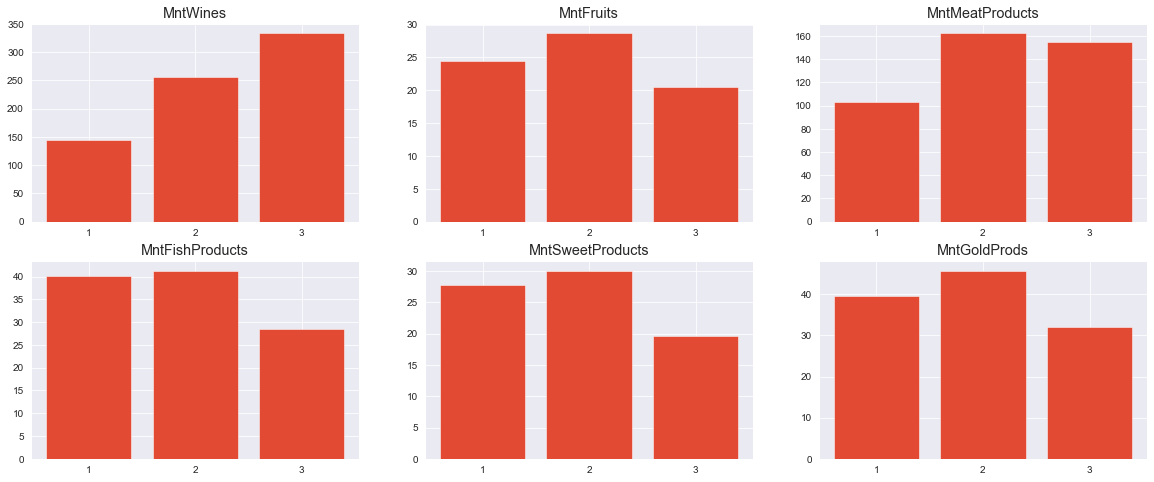

In [35]:
# Также интересно детальнее посмотреть графики по категории "Mnt_all" . Также напишем код немного иным образом.
fig, ax = plt.subplots(2, 3, figsize=(20,8))
gb = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

ax[0, 0].bar(gb.index, gb['MntWines']) 
ax[0, 0].set_title('MntWines')

ax[0, 1].bar(gb.index, gb['MntFruits']) 
ax[0, 1].set_title('MntFruits')

ax[0, 2].bar(gb.index, gb['MntMeatProducts'])
ax[0, 2].set_title('MntMeatProducts')

ax[1, 0].bar(gb.index, gb['MntFishProducts']) 
ax[1, 0].set_title('MntFishProducts')

ax[1, 1].bar(gb.index, gb['MntSweetProducts'])
ax[1, 1].set_title('MntSweetProducts')

ax[1, 2].bar(gb.index, gb['MntGoldProds']) 
ax[1, 2].set_title('MntGoldProds')

#### Основыные выводы по "Education VS категория Mnt_all": 

1. Параметр MntWines:
    - Люди с высоким уровнем образования имеют более высокие траты на винную продукцию. 
    - Самые маленькие суммы на винную продукцию тратят люди с низким уровнем образования.
    - Такое распредление может быть в связи с разницей в доходах по каждой из категорий.
    
2. Параметр MntFruits:
    - Фрукты чаще покупают люди со средним уровнем образования.
    - Меньше всего фруктов покупают пользователи с высоким уровнем образования. Возможно, что основная масса пользователей с высоким урнем образования живет в стране ME, так как именно там очень низкий показатель потребления фруктов через сервис.
    - Мясную продукцию чаще всего покупают пользователи со средним. 
    
3. Параметр MntMeatProducts:
    - Мясную продукцию чаще всего покупают пользователи со средним, а меньше всего с низким.
    
4. Параметр MntFishProducts:
    - Рыбную продукцию чаще всего покупают пользователи со средним, а меньше всего с низким.
     
5. Параметр MntSweetProducts:
    - Кондитерские изделия чаще всего покупают пользователи со средним, а меньше всего с низким.
    
6. Параметр MntGoldProds:
    - Драгоценные изделия чаще всего покупают пользователи со средним.
    - Меньше всего драгоценных изделий через сервер покупают люди с высоким уровнем образования. Возмножно  из-за того, что качество золотыз изделий низкое и рассчитано на массы, или же есть другая на это причина. 

Text(0.5, 1.0, 'MntGoldProds')

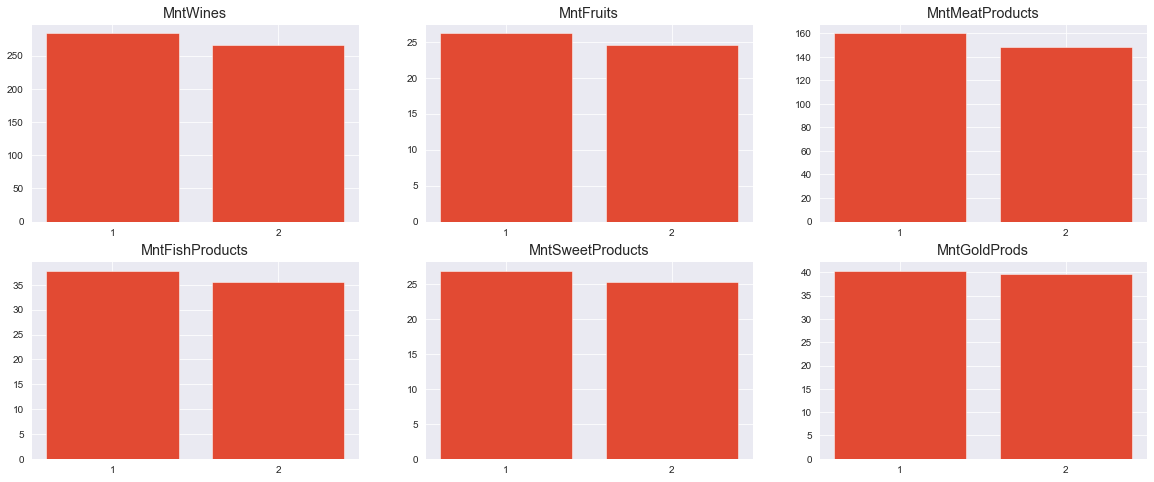

In [36]:
fig, ax = plt.subplots(2, 3, figsize=(20,8))
gb = df.groupby('Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

ax[0, 0].bar(gb.index, gb['MntWines']) 
ax[0, 0].set_title('MntWines')

ax[0, 1].bar(gb.index, gb['MntFruits']) 
ax[0, 1].set_title('MntFruits')

ax[0, 2].bar(gb.index, gb['MntMeatProducts'])
ax[0, 2].set_title('MntMeatProducts')

ax[1, 0].bar(gb.index, gb['MntFishProducts']) 
ax[1, 0].set_title('MntFishProducts')

ax[1, 1].bar(gb.index, gb['MntSweetProducts'])
ax[1, 1].set_title('MntSweetProducts')

ax[1, 2].bar(gb.index, gb['MntGoldProds']) 
ax[1, 2].set_title('MntGoldProds')

#### Основыные выводы по "Status VS категория Mnt_all":  
По всем категориям пользователи сервиса без пары совершают покупки на более высокие суммы, чем люди с парой.


Text(0.5, 1.0, 'MntGoldProds')

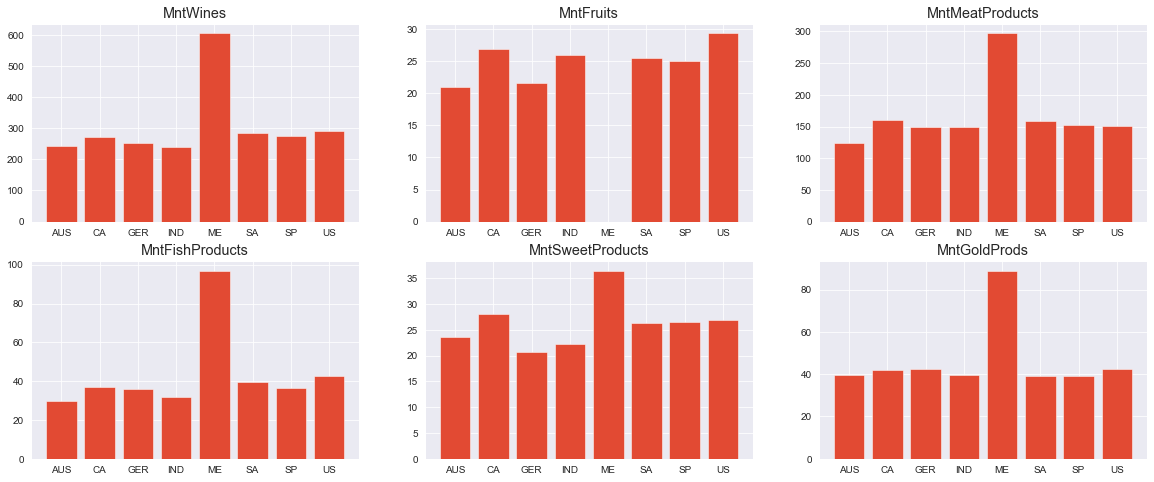

In [37]:
fig, ax = plt.subplots(2, 3, figsize=(20,8))
gb = df.groupby('Country')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

ax[0, 0].bar(gb.index, gb['MntWines']) 
ax[0, 0].set_title('MntWines')

ax[0, 1].bar(gb.index, gb['MntFruits']) 
ax[0, 1].set_title('MntFruits')

ax[0, 2].bar(gb.index, gb['MntMeatProducts'])
ax[0, 2].set_title('MntMeatProducts')

ax[1, 0].bar(gb.index, gb['MntFishProducts']) 
ax[1, 0].set_title('MntFishProducts')

ax[1, 1].bar(gb.index, gb['MntSweetProducts'])
ax[1, 1].set_title('MntSweetProducts')

ax[1, 2].bar(gb.index, gb['MntGoldProds']) 
ax[1, 2].set_title('MntGoldProds')

#### Основыные выводы по "Country VS категория Mnt_all": 
1. Параметр MntWines:
    - Больше всего винной продукции покупают в стране ME.
    - В странах GER, SA, SP, US и CA примерно одинаковая частота покупки винной продукции.
    - Страны AUS и ND реже все из представленных стран покупают данную продукцию.
    
2. Параметр MntFruits:
    - Удивительно, но страна ME меньше всех покупает фрукты через сервис. Возможно это связано с тем, что жители данной страны могут купить по более выгодному предложению фрукты через другие сервисы например, в связи с ее географическим положением.
    - Больше всего фруктов через сервис покупает страна US.
    - Страны ND и SA имеют одинаковые значения. К ним близка страна SP, но все же сумма, потраченная на фрукты в стране SP, отличается немного более низким значением. 
    - На втором месте среди маленьких сумм на покупку фруктов стоит страна AUS.

3. Параметр MntMeatProducts:
    - Больше всего покупают мяса в стране ME, меньше всего - в AUS. 
    - Остальные страны тратят на мясо примерно равные суммы - 150 ден. ед. 
    - По данному критерию можно прировнять страны ND и US, страны SA и GER.
    
4. Параметр MntFishProducts:
    - Больше всего покупают рыбы в стране ME, меньше всего - в ND. 
    - По данному критерию можно прировнять страны SA и GER, страны SP и CA.
     
5. Параметр MntSweetProducts:
    - Больше всего покупают кондитерских изделий в стране ME, меньше всего - в ND и GER. 
    - По данному критерию можно прировнять страны AUS, CA, SA, SP и US.
    
6. Параметр MntGoldProds:
    - Больше всего покупают ювелирных издели в стране ME, меньше всего - в ND, SA и SP. 
    - Остальные страны примерно равны. 

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [38]:
# Если попробовать найти корреляцию с помощью кода df.corr(), то выведиться табличка. 
# Однако ее сложно будет читать, так как придется глазами искать сильно/сывоко коррелированные взаимосвзяи:
df.corr()

,Age,Income,Child,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Mnt_all,Families,Num_Purchases
Age,1.000000,0.213297,0.097362,0.017460,0.165188,0.017549,0.039669,0.032159,0.013069,0.057750,0.076756,0.149496,0.131396,0.151527,-0.144601,0.113772,0.079955,0.179197
Income,0.213297,1.000000,-0.342594,-0.000102,0.708766,0.521610,0.690068,0.542023,0.534270,0.434307,-0.171115,0.508066,0.720856,0.660802,-0.659197,0.792293,-0.295101,0.689911
Child,0.097362,-0.342594,1.000000,-0.001467,-0.381509,-0.393588,-0.524828,-0.433265,-0.395233,-0.310058,0.425045,-0.203365,-0.474494,-0.361200,0.418205,-0.516428,0.839696,-0.318279
Recency,0.017460,-0.000102,-0.001467,1.000000,0.011412,-0.004847,0.029671,-0.003195,0.019592,0.026155,-0.000290,0.008375,0.025052,-0.014202,-0.012295,0.019791,-0.006977,0.005377
MntWines,0.165188,0.708766,-0.381509,0.011412,1.000000,0.417584,0.628681,0.435861,0.420609,0.423057,-0.010395,0.612753,0.715071,0.675718,-0.358891,0.902338,-0.331481,0.760553
MntFruits,0.017549,0.521610,-0.393588,-0.004847,0.417584,1.000000,0.573871,0.591189,0.584026,0.402526,-0.129128,0.351333,0.542547,0.486577,-0.427950,0.629995,-0.337554,0.503634
MntMeatProducts,0.039669,0.690068,-0.524828,0.029671,0.628681,0.573871,1.000000,0.619357,0.569142,0.425602,-0.217110,0.384455,0.730740,0.548453,-0.550484,0.873142,-0.449970,0.592272
MntFishProducts,0.032159,0.542023,-0.433265,-0.003195,0.435861,0.591189,0.619357,1.000000,0.593362,0.448230,-0.164115,0.347850,0.606842,0.477972,-0.463878,0.671546,-0.370294,0.514722
MntSweetProducts,0.013069,0.534270,-0.395233,0.019592,0.420609,0.584026,0.569142,0.593362,1.000000,0.396931,-0.136712,0.359930,0.570962,0.482270,-0.433749,0.630865,-0.338236,0.513292
MntGoldProds,0.057750,0.434307,-0.310058,0.026155,0.423057,0.402526,0.425602,0.448230,0.396931,1.000000,0.041736,0.439600,0.512938,0.439171,-0.268178,0.561944,-0.261301,0.534553


In [39]:
# перед тем, как искать линейные взаимосвязи лучше всего удалить колонку 'Num_Purchases', так как в нее входят отдельные категории, которые будем использовать в корреляции. 
# Параметр 'Mnt_all' - общая сумма трат пользователя в сервисе за 2 года удалять не будем, так как в дальнейшем интересно будет посмотреть зависимость дохода от общих расходов в сервисе, может быть даже с учетом страны. 
# df = df.drop(columns='Mnt_all')
df = df.drop(columns='Num_Purchases')

In [40]:
# Найдем корреляцию в столбик, предварительно отсортировав все значения по возрастонию/убыванию. 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.corr().stack().sort_values()

# при написании данного кода использовались сайты : 
# https://towardsdatascience.com/reshaping-a-dataframe-with-pandas-stack-and-unstack-925dc9ce1289
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas


NumWebVisitsMonth    Income                -0.659197
Income               NumWebVisitsMonth     -0.659197
NumCatalogPurchases  NumWebVisitsMonth     -0.558224
NumWebVisitsMonth    NumCatalogPurchases   -0.558224
                     MntMeatProducts       -0.550484
MntMeatProducts      NumWebVisitsMonth     -0.550484
                     Child                 -0.524828
Child                MntMeatProducts       -0.524828
Mnt_all              NumWebVisitsMonth     -0.517844
NumWebVisitsMonth    Mnt_all               -0.517844
Child                Mnt_all               -0.516428
Mnt_all              Child                 -0.516428
NumCatalogPurchases  Child                 -0.474494
Child                NumCatalogPurchases   -0.474494
NumStorePurchases    NumWebVisitsMonth     -0.467735
NumWebVisitsMonth    NumStorePurchases     -0.467735
MntFishProducts      NumWebVisitsMonth     -0.463878
NumWebVisitsMonth    MntFishProducts       -0.463878
Families             MntMeatProducts       -0.

Таким образом, 3 самые коррелированные взаимосвзяи наблюдабтся у параметров:

    Families, Child = 0.839696
    NumCatalogPurchases,  Mnt_all = 0.826885
    Mnt_all, Income = 0.792293

При этом не до конца понятно, можно ли учитывать параметр Mnt_all (сумма трат клиента за 2 года), ведь в данную категорию входят траты по отдельным категориям (мясо, рыба, украшения и прочее). Хотя с дргуой стороны, логичнее не учитывать корреляцию Mnt_all, например, с MntWines, так как траты на мясо уже уключены в Mnt_all.
 
Если же действительно не учитывать параметр Mnt_all, то 3 самые сильные линейные взаимосвязи наблюдаются у параметров:
    
    Families, Child = 0.839696
    NumCatalogPurchases, MntMeatProducts = 0.792293
    NumCatalogPurchases, Income = 0.720856


<AxesSubplot:>

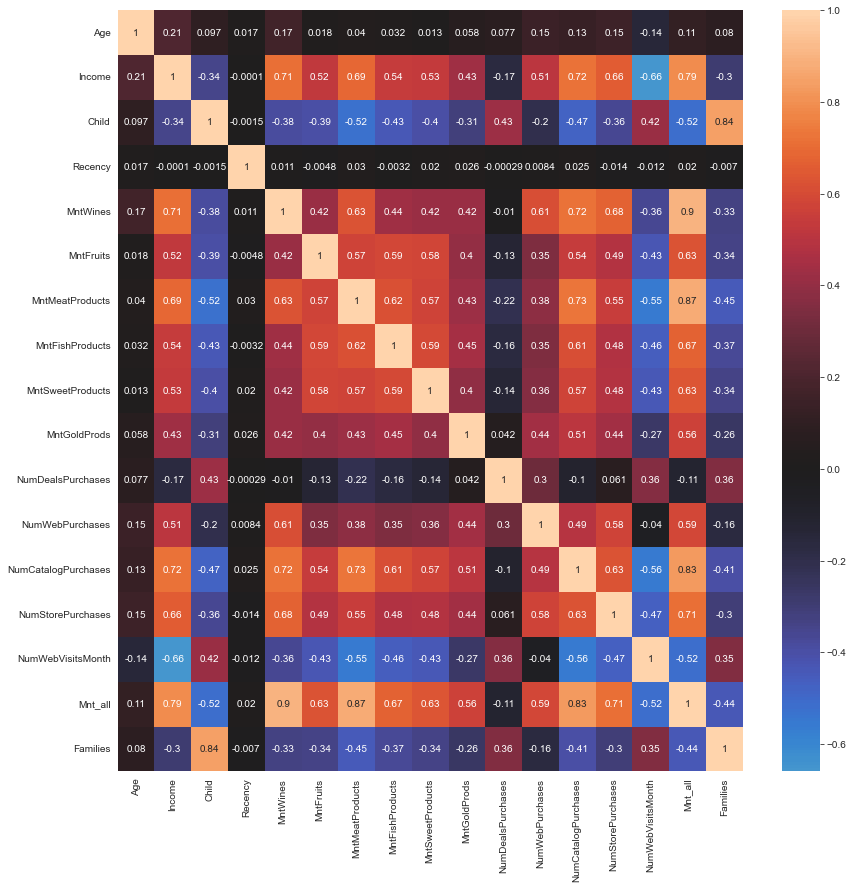

In [41]:
# Проверим правильность решения по тепловой таблице :

plt.figure(figsize=(14, 14))  
sns.heatmap(df.corr(), annot=True, center=0)

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

In [42]:
df.head()

,ID,Age,Education,Income,Child,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Mnt_all,Member,Status,Families,Year,Month
1503,0,37,2,70951.0,0,2013-05-04,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA,1198,0.0,2,2,2013,5
1956,9,47,3,46098.0,2,2012-08-18,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA,120,0.0,1,3,2012,8
1311,13,75,3,25358.0,1,2013-07-22,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA,32,0.0,1,2,2013,7
2052,20,57,1,46891.0,1,2013-09-01,91,43,12,23,29,15,61,1,2,1,4,4,0,0,0,0,0,0,0,GER,183,0.0,2,3,2013,9
2237,22,46,2,46310.0,1,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,309,0.0,1,2,2012,12


### График 1: Категория товаров и возраст

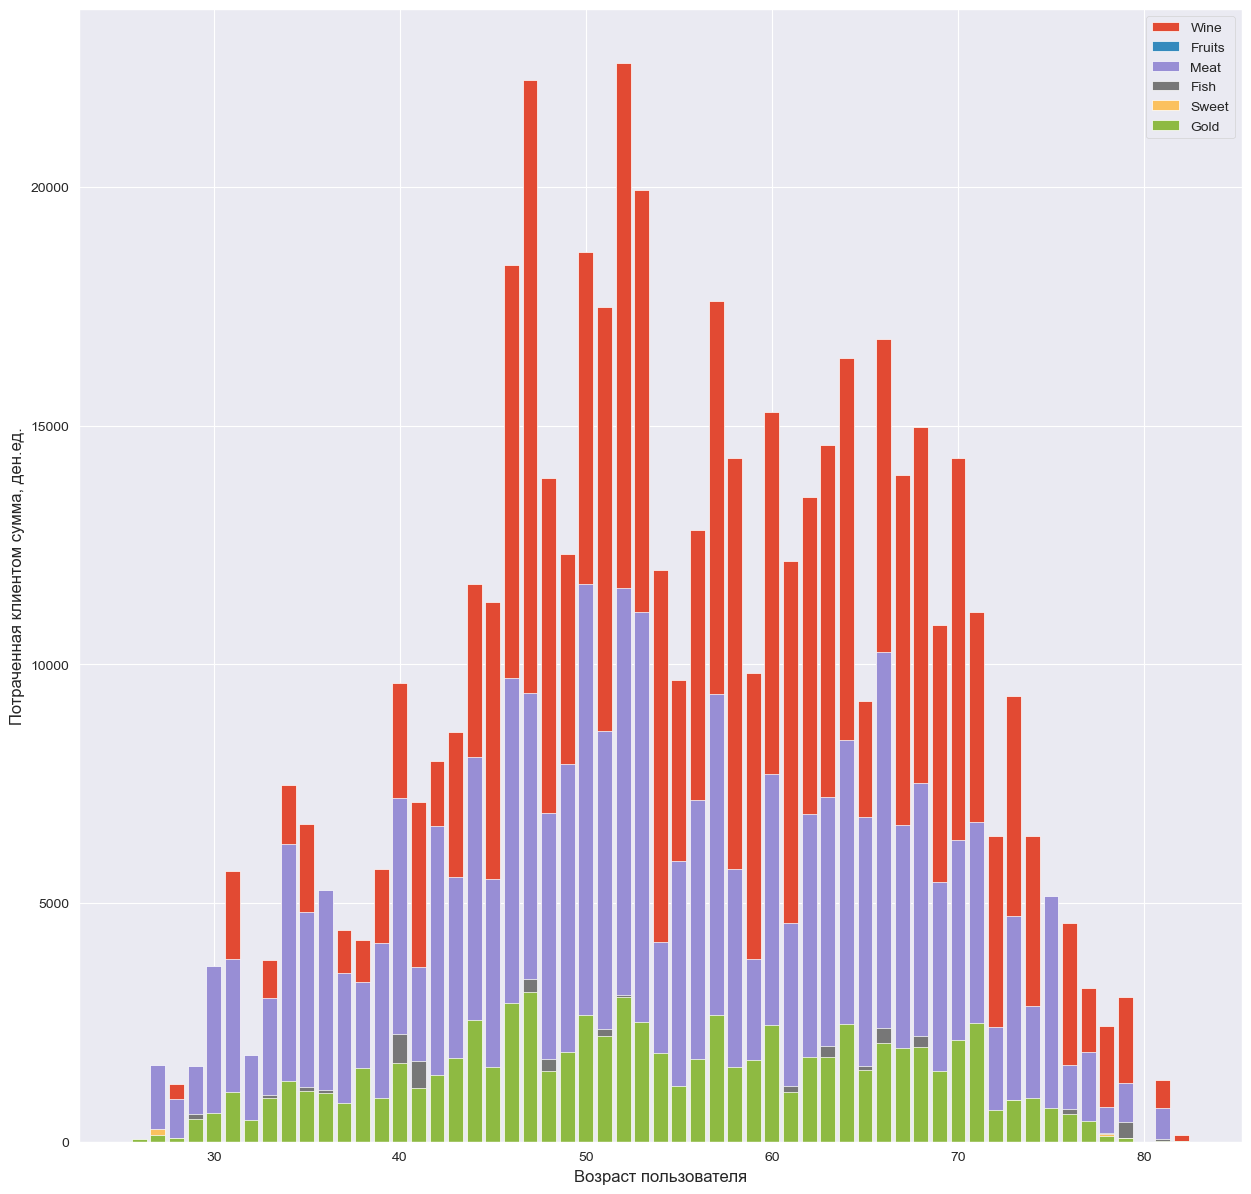

In [53]:
fig, ax = plt.subplots(figsize = (15,15), dpi = 100)

mw = df.groupby('Age').MntWines.sum()
mfr = df.groupby('Age').MntFruits.sum()
mm = df.groupby('Age').MntMeatProducts.sum()
mfi = df.groupby('Age').MntFishProducts.sum()
ms = df.groupby('Age').MntSweetProducts.sum()
mg = df.groupby('Age').MntGoldProds.sum()


plt.bar(mw.index, mw.values, label = 'Wine');
plt.bar(mfr.index, mfr.values, label = 'Fruits');
plt.bar(mm.index, mm.values, label = 'Meat');
plt.bar(mfi.index, mfi.values, label = 'Fish');
plt.bar(ms.index, ms.values, label = 'Sweet');
plt.bar(mg.index, mg.values, label = 'Gold');


plt.xlabel('Возраст пользователя')
plt.ylabel('Потраченная клиентом сумма, ден.ед.')
plt.plot(xdata = 5, ydata = 1000)
plt.grid('white')
plt.legend() 
plt.show() 

##### Описание графика 1:
Как видно из графика, существуют люди, чей вазраст меньше 30 лет, они склонны покупать золото и мясо. 

Также на противоположной части графика есть люди, чей возраст больше 80 лет, история их покупок за 2 года - винная продукция. 

Больше всего вина покупают люди в возрасте от 45 до 58 лет в среднем, однако есть люди возрастом в 70 лет, которые также покупают много вина. 
Мясо сстоит на втором месте по пулярности , его в основном покупают люди в возрасте от 46 до 70 лет. Однако почемуто люди в 59 и 62 покупают мясо меньше. 

Третий по популярности продукт - это золото. его в основном покупают люди в возрасте от 30 до 78 лет. основной пик покупалелей приходится на людей в возрасте 47 лет

Менее популярна рыба, ее в основном покупают только люди в возрасте 41-42 года, остальные очень мало. 

Конфеты покупают люди в возрасте 27 и 78 лет.

### График 2. Страна и общая сумма трат за 2 года 

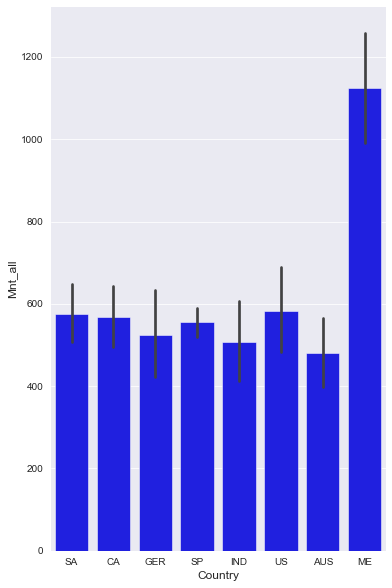

In [44]:
fig, ax = plt.subplots(figsize=(6, 10))

sns.barplot(x='Country', y='Mnt_all', data=df, color='b')
sns.despine(left=True, bottom=True)

##### Описание графика 2:
За 2 года жители страны ME купили больше всего товаров в сервисе. На втором месте жители страны US. Меньше всего товаров купили жители страны AUS. Из этого графика вытекает предположение, что есть связь между страной проживания и доходом. 

### График 3: Страна и доход

<AxesSubplot:xlabel='Country', ylabel='Income'>

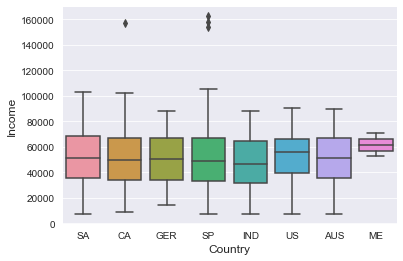

In [55]:
sns.boxplot(x = 'Country', y = 'Income', data = df)

##### Описание графика 3:
По графику видно, что страна ME имеет не сильно высокий доход, в стравнении с другими странами, но медиана и оба квантиля у нее выше. Скорее всго из-за того, что прдставителей страны ME среди пользователей сервиса меньше. Если популяризировать сервис в данной стране, то продажи сильно возрастут, так как даже по такому маленькому соотрношению пользователей видно, что жители страны ME готовы пользваться ревисом. 

На втором месте по доходу стоит страна SP, ее доход начинается с самого низа и доходит до самного верха. Скорее всего жителей данной страны представленно в сервиде больше всех.

В стране GER пользователи получают меньше всех (не беря в рассчет страну ME).

Однако по большей части стран - а именно по SA, CA, GER,SP,AUS - медианное значение дохода прочти одинаково. 

### График 4: уровень образования и доход

<AxesSubplot:xlabel='Education', ylabel='Income'>

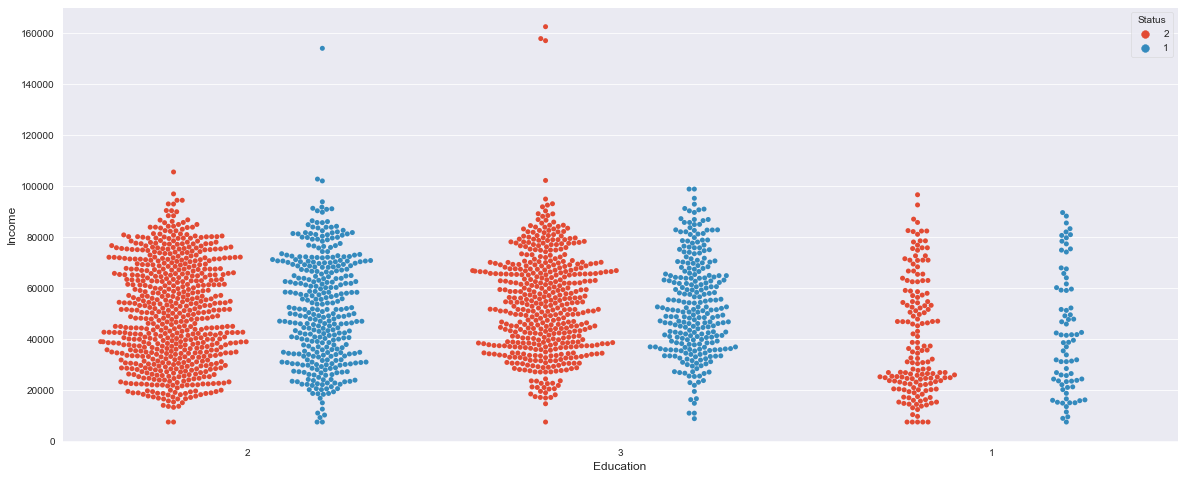

In [45]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.swarmplot(data = df, x = 'Education', y = 'Income', hue = 'Status', dodge = True)


##### Описание графика 4-5:
Как показывает график, уровень образования не сильно влияет на доход пользователя. Значит в сервисе образовательные акции нет большого смысла проводить. 
Красные точки - пользователи сервиса с парой. Синие - одинокие клиенты. 
Доход пары не зависит от уровня образования. Это объясняет то, что на графике "сравнение трат людей с парой/без" (график 5), обе категрии демонстрируют сходие наклонности. 

### График 5: Статус и любимый продукт 

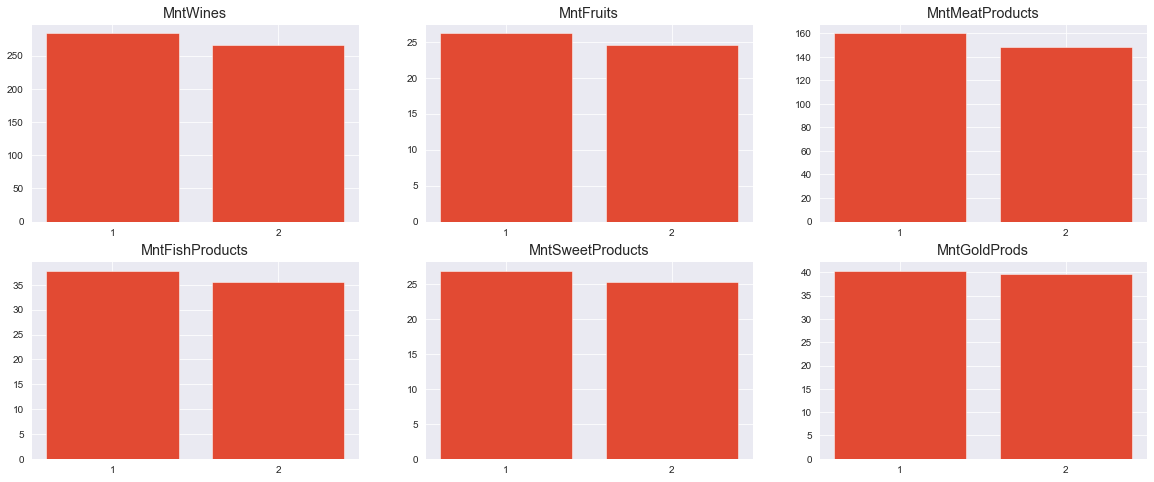

In [59]:
fig, ax = plt.subplots(2, 3, figsize=(20,8))
gb = df.groupby('Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

ax[0, 0].bar(gb.index, gb['MntWines']) 
ax[0, 0].set_title('MntWines')

ax[0, 1].bar(gb.index, gb['MntFruits']) 
ax[0, 1].set_title('MntFruits')

ax[0, 2].bar(gb.index, gb['MntMeatProducts'])
ax[0, 2].set_title('MntMeatProducts')

ax[1, 0].bar(gb.index, gb['MntFishProducts']) 
ax[1, 0].set_title('MntFishProducts')

ax[1, 1].bar(gb.index, gb['MntSweetProducts'])
ax[1, 1].set_title('MntSweetProducts')

ax[1, 2].bar(gb.index, gb['MntGoldProds']) 
ax[1, 2].set_title('MntGoldProds')

plt.show()

### График 6: Страна и сумма потраченная на фрукты

<AxesSubplot:xlabel='Country', ylabel='MntFruits'>

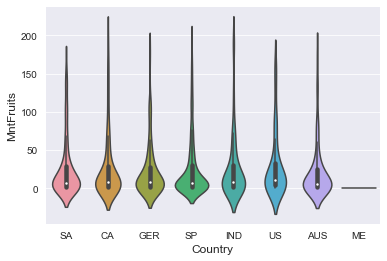

In [46]:
sns.violinplot( x = 'Country', y = 'MntFruits', data = df)

##### Описание графика 6:
как и предполагалось, страна ME не проявляет интерес к фруктам.
Однако страна ND имеет больше вскего трат на фрукты в сервисе.

### График 7: Количество посетителей веб-сайта по месяцам

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Count'>

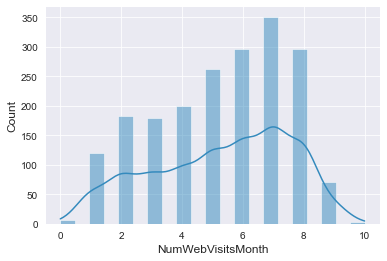

In [48]:
sns.histplot(df['NumWebVisitsMonth'], kde=True)

##### Описание графика 7:
Больше всего посещений в серсисе в 7 месяц года, а меньше всего в 10 месяц. с 2 по 7 месяц наблюдается рост числа пользователей на сайте, но в 3 месяц почемуто есть небольшой спад. 

### График 8: Страна и уровень образования

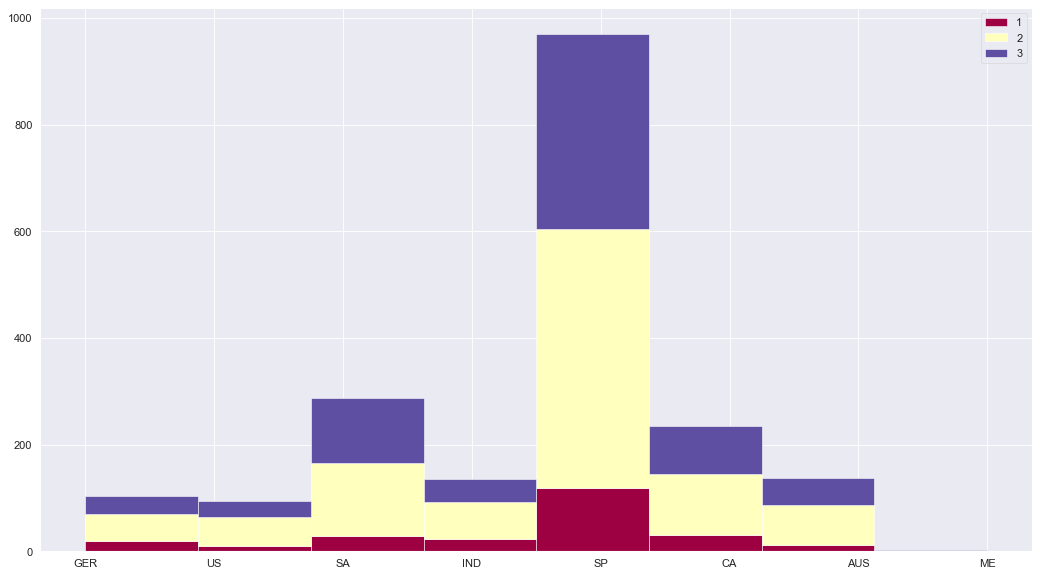

In [49]:
df_agg = df.loc[:, ['Country', 'Education']].groupby('Education') 
vals = [df['Country'].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi= 80) 
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))] 
n, bins, patches = plt.hist(vals, df['Country'].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df['Education']).tolist(), colors[:len(vals)])}) 

plt.show()

# код взят с сайта: https://datascience.stackexchange.com/questions/60798/plotting-stacked-histogram-for-time-series-data

##### Описание графика 8:
В 4х странах приммерно одинаковый уровень высшего образования : GER, US, ND, AUS. 
Самый высокий уровень высшего образования в стране SP, а также низкий уровень. 
В стране ME преобладает высшее образование. 


In [62]:
df.head()

,ID,Age,Education,Income,Child,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Mnt_all,Member,Status,Families,Year,Month
1503,0,37,2,70951.0,0,2013-05-04,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA,1198,0.0,2,2,2013,5
1956,9,47,3,46098.0,2,2012-08-18,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA,120,0.0,1,3,2012,8
1311,13,75,3,25358.0,1,2013-07-22,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA,32,0.0,1,2,2013,7
2052,20,57,1,46891.0,1,2013-09-01,91,43,12,23,29,15,61,1,2,1,4,4,0,0,0,0,0,0,0,GER,183,0.0,2,3,2013,9
2237,22,46,2,46310.0,1,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,309,0.0,1,2,2012,12


## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

Text(0.5, 1.0, 'MntGoldProds')

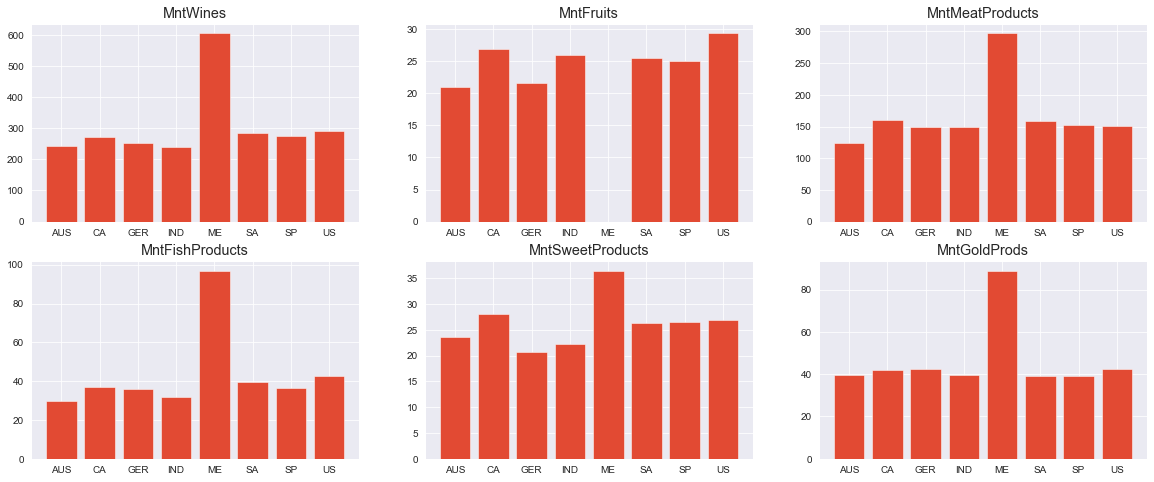

In [67]:
fig, ax = plt.subplots(2, 3, figsize=(20,8))
gb = df.groupby('Country')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

ax[0, 0].bar(gb.index, gb['MntWines']) 
ax[0, 0].set_title('MntWines')

ax[0, 1].bar(gb.index, gb['MntFruits']) 
ax[0, 1].set_title('MntFruits')

ax[0, 2].bar(gb.index, gb['MntMeatProducts'])
ax[0, 2].set_title('MntMeatProducts')

ax[1, 0].bar(gb.index, gb['MntFishProducts']) 
ax[1, 0].set_title('MntFishProducts')

ax[1, 1].bar(gb.index, gb['MntSweetProducts'])
ax[1, 1].set_title('MntSweetProducts')

ax[1, 2].bar(gb.index, gb['MntGoldProds']) 
ax[1, 2].set_title('MntGoldProds')

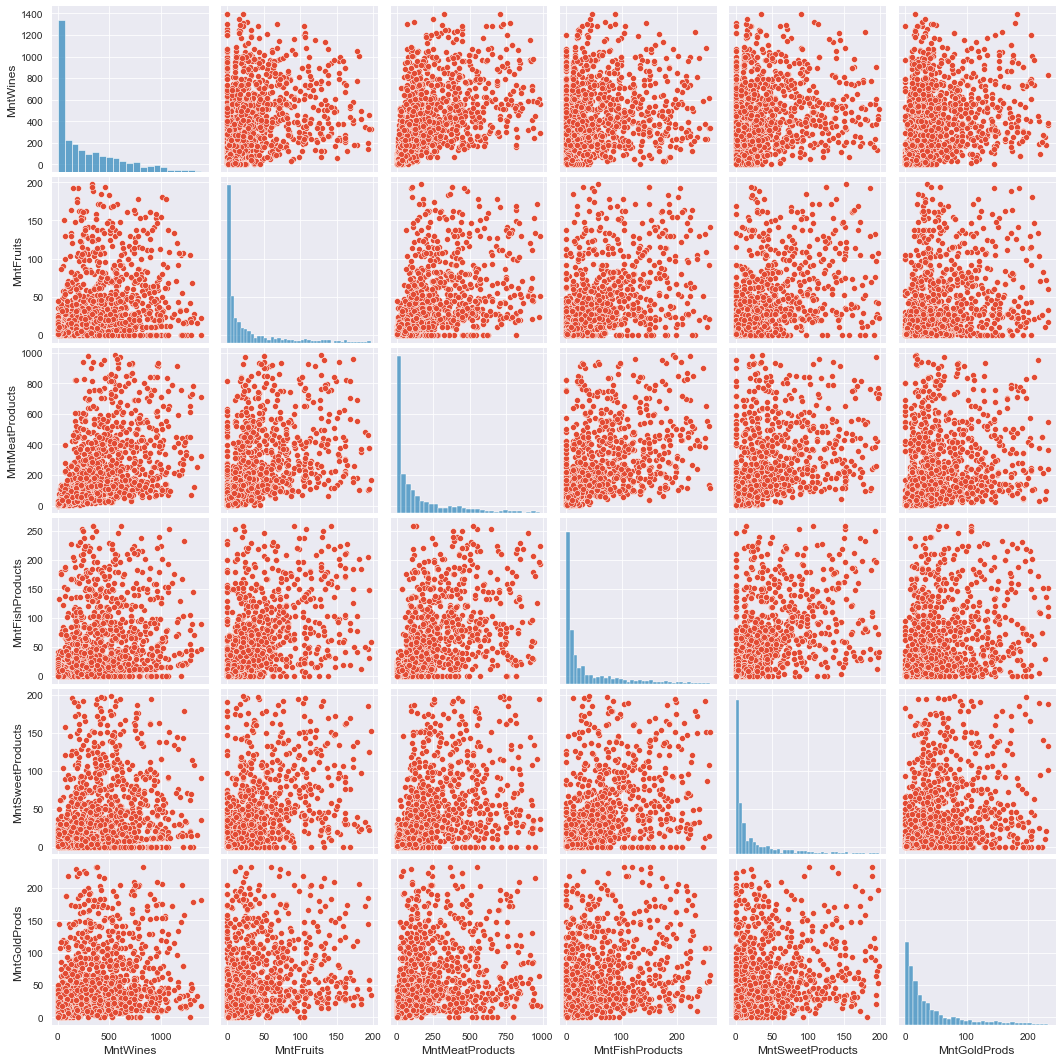

In [66]:
sns.pairplot(df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])

Инетесно заметить то, что больше всего пользователи предпочитают покупать вино, а меньше всего сладкое. 
Жители страны ME  покупают больше всего мяса